# IMPORTING LIBRARIES
I started to the mission by importing the relevant Python libraries. In this case they are:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as st
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

from matplotlib.collections import LineCollection
from sklearn import decomposition
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans

%matplotlib inline

# DATASET PREPARATION

The data from the FAO (Food and Agriculture Organization) is given for an initial analysis of the groupings of countries to be targeted to export the chickens.
In order to go further with the criteria of the PESTEL analysis, I have retrieved other data from the FAO site.

### **Political:** 
These determine the extent to which government and government policy may impact on an organisation or a specific industry. 

Chosen dataset for this aspect is **political stability**.

In [2]:
# Importing Political Stability file
political_stability = pd.read_csv("Political stability.csv")
political_stability

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,2,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2016,2016,index,-2.67,X,International reliable sources,NaN
1,FS,Suite of Food Security Indicators,2,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2017,2017,index,-2.80,X,International reliable sources,NaN
2,FS,Suite of Food Security Indicators,2,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2018,2018,index,-2.75,X,International reliable sources,NaN
3,FS,Suite of Food Security Indicators,3,Albania,6125,Value,21032,Political stability and absence of violence/te...,2016,2016,index,0.34,X,International reliable sources,NaN
4,FS,Suite of Food Security Indicators,3,Albania,6125,Value,21032,Political stability and absence of violence/te...,2017,2017,index,0.38,X,International reliable sources,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,FS,Suite of Food Security Indicators,251,Zambia,6125,Value,21032,Political stability and absence of violence/te...,2017,2017,index,0.15,X,International reliable sources,NaN
587,FS,Suite of Food Security Indicators,251,Zambia,6125,Value,21032,Political stability and absence of violence/te...,2018,2018,index,0.09,X,International reliable sources,NaN
588,FS,Suite of Food Security Indicators,181,Zimbabwe,6125,Value,21032,Political stability and absence of violence/te...,2016,2016,index,-0.62,X,International reliable sources,NaN
589,FS,Suite of Food Security Indicators,181,Zimbabwe,6125,Value,21032,Political stability and absence of violence/te...,2017,2017,index,-0.71,X,International reliable sources,NaN


In [3]:
## Selecting necessary columns & renaming
political_stability = political_stability[['Area', 'Year', 'Value']]
political_stability = political_stability.set_axis(['Zone','Year','Political Stability'], axis=1, inplace=False)
political_stability.index = political_stability['Zone']
political_stability=political_stability.drop(columns=['Zone'])
political_stability

,Year,Political Stability
Zone,,
Afghanistan,2016,-2.67
Afghanistan,2017,-2.80
Afghanistan,2018,-2.75
Albania,2016,0.34
Albania,2017,0.38
...,...,...
Zambia,2017,0.15
Zambia,2018,0.09
Zimbabwe,2016,-0.62


In [4]:
## Selecting year 2018
ps = political_stability.loc[political_stability['Year'] == 2018]
ps = ps.set_axis(['Year','Political Stability in 2018'], axis=1, inplace=False)

## Selecting year 2016
ps2 = political_stability.loc[political_stability['Year'] == 2016]
ps2 = ps2.set_axis(['Year','Political Stability in 2016'], axis=1, inplace=False)

In [5]:
## Calculating Political Stability Rate between 2018 and 2016
political_stability=political_stability.drop(columns=['Year', 'Political Stability'])
political_stability["Political Stability Rate (%)"] = (( ps["Political Stability in 2018"] - ps2["Political Stability in 2016"]) / ps["Political Stability in 2018"] ) * 100
political_stability = political_stability.reset_index()
political_stability = political_stability.groupby(['Zone'])['Political Stability Rate (%)'].mean()

political_stability = pd.DataFrame(political_stability)
political_stability = round(political_stability, 2)
political_stability

,Political Stability Rate (%)
Zone,
Afghanistan,2.91
Albania,10.53
Algeria,-32.53
American Samoa,0.83
Andorra,0.70
...,...
Venezuela (Bolivarian Republic of),22.73
Viet Nam,-109.09
Yemen,6.69


In [6]:
## Replacing INF values with NaN
political_stability.replace([np.inf, -np.inf], 0, inplace=True)

### **Economic:** 
An economic factor has a direct impact on the economy and its performance, which in turn directly impacts on the organisation and its profitability. 
Chosen dataset for this aspect is;

                1- Foreign Exchange Rates
                2- Producers' Cost of Production
                3- PIB Rate
                4- Foreign Direct Investment Rate

In [7]:
# Importing Exchange Rate file
exchange_rate = pd.read_csv("Exchange rates.csv")
exchange_rate

,Domain Code,Domain,Area Code (FAO),Area,ISO Currency Code (FAO),Currency,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,PE,Exchange rates - Annual,2,Afghanistan,AFN,Afghani,5540,Standard local currency units per USD,2016,2016,NaN,67.866086,X,International reliable sources,Data from UNSD AMA
1,PE,Exchange rates - Annual,2,Afghanistan,AFN,Afghani,5540,Standard local currency units per USD,2017,2017,NaN,68.026904,X,International reliable sources,Data from UNSD AMA
2,PE,Exchange rates - Annual,2,Afghanistan,AFN,Afghani,5540,Standard local currency units per USD,2018,2018,NaN,72.083247,X,International reliable sources,Data from UNSD AMA
3,PE,Exchange rates - Annual,3,Albania,ALL,Lek,5540,Standard local currency units per USD,2016,2016,NaN,124.140872,X,International reliable sources,Data from UNSD AMA
4,PE,Exchange rates - Annual,3,Albania,ALL,Lek,5540,Standard local currency units per USD,2017,2017,NaN,119.099667,X,International reliable sources,Data from UNSD AMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,PE,Exchange rates - Annual,251,Zambia,ZMW,Zambian Kwacha,5540,Standard local currency units per USD,2017,2017,NaN,9.519501,X,International reliable sources,Data from UNSD AMA
626,PE,Exchange rates - Annual,251,Zambia,ZMW,Zambian Kwacha,5540,Standard local currency units per USD,2018,2018,NaN,10.458143,X,International reliable sources,Data from UNSD AMA
627,PE,Exchange rates - Annual,181,Zimbabwe,USD,US Dollar,5540,Standard local currency units per USD,2016,2016,NaN,1.000000,X,International reliable sources,Data from UNSD AMA
628,PE,Exchange rates - Annual,181,Zimbabwe,USD,US Dollar,5540,Standard local currency units per USD,2017,2017,NaN,1.000000,X,International reliable sources,Data from UNSD AMA


In [8]:
## Selecting necessary columns & renaming
exchange_rate = exchange_rate[['Area', 'Year', 'Value']]
exchange_rate = exchange_rate.set_axis(['Zone','Year','Local Currency per USD'], axis=1, inplace=False)
exchange_rate.index = exchange_rate['Zone']
exchange_rate=exchange_rate.drop(columns=['Zone'])
exchange_rate

,Year,Local Currency per USD
Zone,,
Afghanistan,2016,67.866086
Afghanistan,2017,68.026904
Afghanistan,2018,72.083247
Albania,2016,124.140872
Albania,2017,119.099667
...,...,...
Zambia,2017,9.519501
Zambia,2018,10.458143
Zimbabwe,2016,1.000000


In [9]:
## Selecting year 2018
er = exchange_rate.loc[exchange_rate['Year'] == 2018]
er = er.set_axis(['Year','Exchange Rate in 2018'], axis=1, inplace=False)

## Selecting year 2016
er2 = exchange_rate.loc[exchange_rate['Year'] == 2016]
er2 = er2.set_axis(['Year','Exchange Rate in 2016'], axis=1, inplace=False)

In [10]:
## Calculating Exchange Rate between 2018 and 2016
exchange_rate=exchange_rate.drop(columns=['Year', 'Local Currency per USD'])
exchange_rate["Exchange Rate (%)"] = (( er["Exchange Rate in 2018"] - er2["Exchange Rate in 2016"]) / er["Exchange Rate in 2018"] ) * 100
exchange_rate = exchange_rate.reset_index()
exchange_rate = exchange_rate.groupby(['Zone'])['Exchange Rate (%)'].mean()

exchange_rate = pd.DataFrame(exchange_rate)
exchange_rate = round(exchange_rate, 2)
exchange_rate

,Exchange Rate (%)
Zone,
Afghanistan,5.85
Albania,-14.96
Algeria,6.13
Andorra,-6.76
Angola,35.28
...,...
Venezuela (Bolivarian Republic of),99.98
Viet Nam,2.95
Yemen,3.59


In [11]:
# Importing Producers' Cost of Production file
pcpf = pd.read_csv("Producer Prices of Products.csv")
pcpf

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),515,Apples,2016,2016,7021,Annual value,USD,381,NaN,Official data
1,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),526,Apricots,2016,2016,7021,Annual value,USD,732,NaN,Official data
2,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),44,Barley,2016,2016,7021,Annual value,USD,320,NaN,Official data
3,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),176,"Beans, dry",2016,2016,7021,Annual value,USD,1662,NaN,Official data
4,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),414,"Beans, green",2016,2016,7021,Annual value,USD,768,NaN,Official data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15097,PP,Producer Prices,181,Zimbabwe,5532,Producer Price (USD/tonne),83,Sorghum,2018,2018,7021,Annual value,USD,390,NaN,Official data
15098,PP,Producer Prices,181,Zimbabwe,5532,Producer Price (USD/tonne),236,Soybeans,2018,2018,7021,Annual value,USD,780,NaN,Official data
15099,PP,Producer Prices,181,Zimbabwe,5532,Producer Price (USD/tonne),267,Sunflower seed,2018,2018,7021,Annual value,USD,300,NaN,Official data
15100,PP,Producer Prices,181,Zimbabwe,5532,Producer Price (USD/tonne),826,"Tobacco, unmanufactured",2018,2018,7021,Annual value,USD,2920,NaN,Official data


In [12]:
## Selecting necessary columns & renaming
pcpf = pcpf[['Area', 'Item', 'Year', 'Value']]
pcpf = pcpf.set_axis(['Zone','Product', 'Year','Production Cost Value USD/tons'], axis=1, inplace=False)
pcpf.index = pcpf['Zone']
pcpf=pcpf.drop(columns=['Zone'])
pcpf

,Product,Year,Production Cost Value USD/tons
Zone,,,
Albania,Apples,2016,381
Albania,Apricots,2016,732
Albania,Barley,2016,320
Albania,"Beans, dry",2016,1662
Albania,"Beans, green",2016,768
...,...,...,...
Zimbabwe,Sorghum,2018,390
Zimbabwe,Soybeans,2018,780
Zimbabwe,Sunflower seed,2018,300


In [13]:
## Selecting year 2018
pcp = pcpf.loc[pcpf['Year'] == 2018]
pcp = pcp.set_axis(['Product', 'Year','Production Cost in 2018'], axis=1, inplace=False)
pcp['Production Cost in 2018'] = pcp['Production Cost in 2018'].fillna(0)
pcp = pcp.reset_index()
pcp = pcp.groupby(['Zone'])['Production Cost in 2018'].mean()
pcp = pd.DataFrame(pcp)

## Selecting year 2016
pcp2 = pcpf.loc[pcpf['Year'] == 2016]
pcp2 = pcp2.set_axis(['Product', 'Year','Production Cost in 2016'], axis=1, inplace=False)
pcp2['Production Cost in 2016'] = pcp2['Production Cost in 2016'].fillna(0)
pcp2 = pcp2.reset_index()
pcp2 = pcp2.groupby(['Zone'])['Production Cost in 2016'].mean()
pcp2 = pd.DataFrame(pcp2)

In [14]:
## Calculating Producers' Cost of Production Rate between 2018 and 2016
pcpf=pcpf.drop(columns=['Product', 'Year', 'Production Cost Value USD/tons'])
pcpf["Producers' Cost of Production Rate (%)"] = (( pcp["Production Cost in 2018"] - pcp2["Production Cost in 2016"]) / pcp["Production Cost in 2018"] ) * 100
pcpf = pcpf.reset_index()
pcpf = pcpf.groupby(['Zone'])["Producers' Cost of Production Rate (%)"].mean()

pcpf = pd.DataFrame(pcpf)
pcpf = round(pcpf, 2)
pcpf

,Producers' Cost of Production Rate (%)
Zone,
Albania,13.13
Algeria,-0.65
Argentina,-15.97
Armenia,7.52
Australia,0.98
...,...
Uruguay,11.58
Viet Nam,-5.34
Yemen,-2.68


In [15]:
# Importing PIB file
pib = pd.read_csv("PIB.csv")
pib

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,MK,Macro Indicators,2,Afghanistan,6119,Value US$ per capita,22008,Gross Domestic Product,2016,2016,US$,509.782123,X,International reliable sources,NaN
1,MK,Macro Indicators,2,Afghanistan,6119,Value US$ per capita,22008,Gross Domestic Product,2017,2017,US$,513.085978,X,International reliable sources,NaN
2,MK,Macro Indicators,2,Afghanistan,6119,Value US$ per capita,22008,Gross Domestic Product,2018,2018,US$,483.885875,X,International reliable sources,NaN
3,MK,Macro Indicators,3,Albania,6119,Value US$ per capita,22008,Gross Domestic Product,2016,2016,US$,4109.340457,X,International reliable sources,NaN
4,MK,Macro Indicators,3,Albania,6119,Value US$ per capita,22008,Gross Domestic Product,2017,2017,US$,4514.204908,X,International reliable sources,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,MK,Macro Indicators,251,Zambia,6119,Value US$ per capita,22008,Gross Domestic Product,2017,2017,US$,1534.874627,X,International reliable sources,NaN
629,MK,Macro Indicators,251,Zambia,6119,Value US$ per capita,22008,Gross Domestic Product,2018,2018,US$,1556.338275,X,International reliable sources,NaN
630,MK,Macro Indicators,181,Zimbabwe,6119,Value US$ per capita,22008,Gross Domestic Product,2016,2016,US$,1464.589686,X,International reliable sources,NaN
631,MK,Macro Indicators,181,Zimbabwe,6119,Value US$ per capita,22008,Gross Domestic Product,2017,2017,US$,1548.186368,X,International reliable sources,NaN


In [16]:
## Selecting necessary columns & renaming
pib = pib[['Area', 'Year', 'Value']]
pib = pib.set_axis(['Zone','Year','PIB USD per Personne'], axis=1, inplace=False)
pib.index = pib['Zone']
pib=pib.drop(columns=['Zone'])
pib

,Year,PIB USD per Personne
Zone,,
Afghanistan,2016,509.782123
Afghanistan,2017,513.085978
Afghanistan,2018,483.885875
Albania,2016,4109.340457
Albania,2017,4514.204908
...,...,...
Zambia,2017,1534.874627
Zambia,2018,1556.338275
Zimbabwe,2016,1464.589686


In [17]:
## Selecting year 2018
pb = pib.loc[pib['Year'] == 2018]
pb = pb.set_axis(['Year','PIB in 2018'], axis=1, inplace=False)

## Selecting year 2016
pb2 = pib.loc[pib['Year'] == 2016]
pb2 = pb2.set_axis(['Year','PIB in 2016'], axis=1, inplace=False)

In [18]:
## Calculating PIB Rate between 2018 and 2016
pib=pib.drop(columns=['Year', 'PIB USD per Personne'])
pib["PIB Rate (%)"] = (( pb["PIB in 2018"] - pb2["PIB in 2016"]) / pb["PIB in 2018"] ) * 100
pib = pib.reset_index()
pib = pib.groupby(['Zone'])['PIB Rate (%)'].mean()

pib = pd.DataFrame(pib)
pib = round(pib, 2)
pib

,PIB Rate (%)
Zone,
Afghanistan,-5.35
Albania,21.79
Algeria,5.00
Andorra,10.40
Angola,-6.58
...,...
Venezuela (Bolivarian Republic of),-36.85
Viet Nam,14.58
Yemen,-0.93


In [19]:
# Importing Foreign Direct Investment file
fdi = pd.read_csv("Foreign Direct Investment.csv")
fdi

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FDI,Foreign Direct Investment (FDI),2,Afghanistan,6110,Value US$,23082,Total FDI inflows,2016,2016,millions,93.590000,X,International reliable sources,UNCTAD
1,FDI,Foreign Direct Investment (FDI),2,Afghanistan,6110,Value US$,23082,Total FDI inflows,2017,2017,millions,53.390000,X,International reliable sources,UNCTAD
2,FDI,Foreign Direct Investment (FDI),2,Afghanistan,6110,Value US$,23082,Total FDI inflows,2018,2018,millions,119.440000,X,International reliable sources,UNCTAD
3,FDI,Foreign Direct Investment (FDI),3,Albania,6110,Value US$,23082,Total FDI inflows,2016,2016,millions,1100.671891,X,International reliable sources,UNCTAD
4,FDI,Foreign Direct Investment (FDI),3,Albania,6110,Value US$,23082,Total FDI inflows,2017,2017,millions,1148.891224,X,International reliable sources,UNCTAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,FDI,Foreign Direct Investment (FDI),251,Zambia,6110,Value US$,23082,Total FDI inflows,2017,2017,millions,1107.500000,X,International reliable sources,UNCTAD
596,FDI,Foreign Direct Investment (FDI),251,Zambia,6110,Value US$,23082,Total FDI inflows,2018,2018,millions,408.438492,X,International reliable sources,UNCTAD
597,FDI,Foreign Direct Investment (FDI),181,Zimbabwe,6110,Value US$,23082,Total FDI inflows,2016,2016,millions,371.810503,X,International reliable sources,UNCTAD
598,FDI,Foreign Direct Investment (FDI),181,Zimbabwe,6110,Value US$,23082,Total FDI inflows,2017,2017,millions,349.419580,X,International reliable sources,UNCTAD


In [20]:
## Selecting necessary columns & renaming
fdi = fdi[['Area', 'Year', 'Value']]
fdi = fdi.set_axis(['Zone','Year','FDI Value USD'], axis=1, inplace=False)
fdi.index = fdi['Zone']
fdi=fdi.drop(columns=['Zone'])
fdi

,Year,FDI Value USD
Zone,,
Afghanistan,2016,93.590000
Afghanistan,2017,53.390000
Afghanistan,2018,119.440000
Albania,2016,1100.671891
Albania,2017,1148.891224
...,...,...
Zambia,2017,1107.500000
Zambia,2018,408.438492
Zimbabwe,2016,371.810503


In [21]:
## Selecting year 2018
fd = fdi.loc[fdi['Year'] == 2018]
fd = fd.set_axis(['Year','FDI in 2018'], axis=1, inplace=False)

## Selecting year 2016
fd2 = fdi.loc[fdi['Year'] == 2016]
fd2 = fd2.set_axis(['Year','FDI in 2016'], axis=1, inplace=False)

In [22]:
## Calculating FDI Rate between 2018 and 2016
fdi=fdi.drop(columns=['Year', 'FDI Value USD'])
fdi["FDI Rate (%)"] = (( fd["FDI in 2018"] - fd2["FDI in 2016"]) / fd["FDI in 2018"] ) * 100
fdi = fdi.reset_index()
fdi = fdi.groupby(['Zone'])['FDI Rate (%)'].mean()

fdi = pd.DataFrame(fdi)
fdi = round(fdi, 2)
fdi

,FDI Rate (%)
Zone,
Afghanistan,21.64
Albania,14.66
Algeria,-11.61
Angola,97.22
Anguilla,-8.01
...,...
Venezuela (Bolivarian Republic of),-20.54
Viet Nam,18.71
Yemen,-98.87


### **Social:** 
The focus here is on the social environment and identifying emerging trends. This helps a marketer to further understand consumer needs and wants in a social setting. 
Chosen dataset for this aspect is;

                1- Consommation Behaviour of the Country:
                                 * Disponibility alimentaire (Kcal/personne/jour)
                                 * Disponibility de proteines en quantity (g/personne/jour)
                                 * Animal Base Protein Consumption (calculated)
                                 * Production
                                 * Importation
                                                
                2- Population Growth Rate    

In [23]:
# Importing Population file
population = pd.read_csv("Population_2000_2018.csv")
population

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [24]:
## Selecting necessary columns & renaming
population = population[['Zone', 'Année', 'Valeur']]
population = population.set_axis(['Zone','Year','Population (in thousand)'], axis=1, inplace=False)
population.index = population['Zone']
population=population.drop(columns=['Zone'])
population

,Year,Population (in thousand)
Zone,,
Afghanistan,2000,20779.953
Afghanistan,2001,21606.988
Afghanistan,2002,22600.770
Afghanistan,2003,23680.871
Afghanistan,2004,24726.684
...,...,...
Zimbabwe,2014,13586.707
Zimbabwe,2015,13814.629
Zimbabwe,2016,14030.331


In [25]:
## Selecting year 2018
df = population.loc[population['Year'] == 2018]
df = df.set_axis(['Year','Population in 2018'], axis=1, inplace=False)

## Selecting year 2016
df2 = population.loc[population['Year'] == 2016]
df2 = df2.set_axis(['Year','Population in 2016'], axis=1, inplace=False)

In [26]:
## Calculating Population Growth Rate between 2018 and 2016
population=population.drop(columns=['Year', 'Population (in thousand)'])
population["Population Growth Rate (%)"] = (( df["Population in 2018"] - df2["Population in 2016"]) / df["Population in 2018"] ) * 100
population = population.reset_index()
population = population.groupby(['Zone'])['Population Growth Rate (%)'].mean()

population = pd.DataFrame(population)
population = round(population, 2)
population

,Population Growth Rate (%)
Zone,
Afghanistan,4.81
Afrique du Sud,2.74
Albanie,-0.13
Algérie,3.97
Allemagne,1.12
...,...
Îles Salomon,5.12
Îles Turques-et-Caïques,2.94
Îles Vierges américaines,-0.15


In [27]:
# Importing Protein Source of Products file
psop = pd.read_csv("Protein Source of Products.csv")
psop

,Zone,Année,Élément,Produit,Base de Produit,Unité,Valeur
0,Afghanistan,2017,Production,Abats Comestible,Vegetal,Milliers de tonnes,48.00
1,Afghanistan,2017,Importations - Quantité,Abats Comestible,Vegetal,Milliers de tonnes,6.00
2,Afghanistan,2017,Disponibilité intérieure,Abats Comestible,Vegetal,Milliers de tonnes,53.00
3,Afghanistan,2017,Résidus,Abats Comestible,Vegetal,Milliers de tonnes,0.00
4,Afghanistan,2017,Nourriture,Abats Comestible,Vegetal,Milliers de tonnes,53.00
...,...,...,...,...,...,...,...
176595,Zimbabwe,2017,Nourriture,Vin,Vegetal,Milliers de tonnes,3.00
176596,Zimbabwe,2017,Disponibilité alimentaire en quantité (kg/pers...,Vin,Vegetal,kg,0.23
176597,Zimbabwe,2017,Disponibilité alimentaire (Kcal/personne/jour),Vin,Vegetal,Kcal/personne/jour,0.00
176598,Zimbabwe,2017,Disponibilité de protéines en quantité (g/pers...,Vin,Vegetal,g/personne/jour,0.00


In [28]:
ps = psop.loc[psop['Élément'] == 'Disponibilité de protéines en quantité (g/personne/jour)']
ps

,Zone,Année,Élément,Produit,Base de Produit,Unité,Valeur
7,Afghanistan,2017,Disponibilité de protéines en quantité (g/pers...,Abats Comestible,Vegetal,g/personne/jour,0.64
18,Afghanistan,2017,Disponibilité de protéines en quantité (g/pers...,"Agrumes, Autres",Vegetal,g/personne/jour,0.02
29,Afghanistan,2017,Disponibilité de protéines en quantité (g/pers...,Aliments pour enfants,Vegetal,g/personne/jour,0.04
38,Afghanistan,2017,Disponibilité de protéines en quantité (g/pers...,Ananas et produits,Vegetal,g/personne/jour,0.00
48,Afghanistan,2017,Disponibilité de protéines en quantité (g/pers...,Arachides Decortiquees,Vegetal,g/personne/jour,0.02
...,...,...,...,...,...,...,...
176551,Zimbabwe,2017,Disponibilité de protéines en quantité (g/pers...,Viande de Suides,Animal,g/personne/jour,0.56
176564,Zimbabwe,2017,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,Animal,g/personne/jour,1.59
176576,Zimbabwe,2017,Disponibilité de protéines en quantité (g/pers...,Viande d'Ovins/Caprins,Animal,g/personne/jour,0.65
176588,Zimbabwe,2017,Disponibilité de protéines en quantité (g/pers...,"Viande, Autre",Animal,g/personne/jour,1.24


In [29]:
ps2 = ps.groupby(['Zone']).sum()
ps2 = ps2.drop(columns=['Année'])
ps2 = pd.DataFrame(ps2)
ps2

,Valeur
Zone,
Afghanistan,54.09
Afrique du Sud,83.36
Albanie,119.50
Algérie,92.85
Allemagne,104.07
...,...
Émirats arabes unis,107.26
Équateur,65.77
États-Unis d'Amérique,113.61


In [30]:
ps1 = ps.loc[ps['Base de Produit'] == 'Animal']
ps1 = ps1.drop(columns=['Année'])
ps1 = ps1.groupby(['Zone']).sum()
ps1 = pd.DataFrame(ps1)
ps1

,Valeur
Zone,
Afghanistan,9.92
Afrique du Sud,31.78
Albanie,63.49
Algérie,25.05
Allemagne,62.19
...,...
Émirats arabes unis,42.51
Équateur,28.69
États-Unis d'Amérique,73.21


In [31]:
psop.index = psop['Zone']
psop = psop.drop(columns=['Zone', 'Année', 'Élément', 'Produit', 'Base de Produit', 'Unité', 'Valeur'])
psop["Animal Base Protein Consumption Rate (%)"] = ( ps1["Valeur"] / ps2["Valeur"] ) * 100
psop = psop.reset_index()
psop = psop.groupby(['Zone'])['Animal Base Protein Consumption Rate (%)'].mean()
psop = pd.DataFrame(psop)
psop

,Animal Base Protein Consumption Rate (%)
Zone,
Afghanistan,18.339804
Afrique du Sud,38.123800
Albanie,53.129707
Algérie,26.978998
Allemagne,59.757855
...,...
Émirats arabes unis,39.632668
Équateur,43.621712
États-Unis d'Amérique,64.439750


In [32]:
# Importing Disponibilite Alimentaire file
dispo_alim = pd.read_csv("DisponibiliteAlimentaire_2017.csv")
dispo_alim

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


In [33]:
## Selecting necessary columns & renaming
dispo_alim = dispo_alim[['Zone', 'Élément', 'Valeur']]
dispo_alim = dispo_alim.set_axis(['Zone','Élément','Valeur (Milliers de tonnes)'], axis=1, inplace=False)

## Total sum per 'element' & 'zone'
dispo_alim = dispo_alim.groupby(['Zone','Élément'])['Valeur (Milliers de tonnes)'].sum()
dispo_alim = pd.DataFrame(dispo_alim)
dispo_alim = dispo_alim.reset_index()

## Pivoting 'Élément' column
dispo_alim.pivot(index=['Zone'], columns='Élément', values=['Valeur (Milliers de tonnes)'])
dispo_alim = pd.DataFrame(dispo_alim.pivot(index=['Zone'], columns='Élément', values=['Valeur (Milliers de tonnes)']))

dispo_alim

Valeur (Milliers de tonnes)                        \
Élément               Alimentation pour touristes Aliments pour animaux   
Zone                                                                      
Afghanistan                                   NaN                 456.0   
Afrique du Sud                                0.0                9371.0   
Albanie                                       NaN                 697.0   
Algérie                                       0.0                4884.0   
Allemagne                                     NaN               30904.0   
...                                           ...                   ...   
Émirats arabes unis                           NaN                1479.0   
Équateur                                      0.0                1017.0   
États-Unis d'Amérique                         NaN              151389.0   
Éthiopie                                      0.0                4710.0   
Îles Salomon                                182.0                  15.0   

                                                             \
Élément               Autres utilisations (non alimentaire)   
Zone                                                          
Afghanistan                                            94.0   
Afrique du Sud                                       1448.0   
Albanie                                               177.0   
Algérie                                              2405.0   
Allemagne                                            8316.0   
...                                                     ...   
Émirats arabes unis                                  2661.0   
Équateur                                             2475.0   
États-Unis d'Amérique                              171964.0   
Éthiopie                                             4126.0   
Îles Salomon                                           11.0   

                                                                      \
Élément               Disponibilité alimentaire (Kcal/personne/jour)   
Zone                                                                   
Afghanistan                                                   1997.0   
Afrique du Sud                                                2987.0   
Albanie                                                       3400.0   
Algérie                                                       3345.0   
Allemagne                                                     3559.0   
...                                                              ...   
Émirats arabes unis                                           3370.0   
Équateur                                                      2585.0   
États-Unis d'Amérique                                         3762.0   
Éthiopie                                                      2304.0   
Îles Salomon                                                  2410.0   

                                                                              \
Élément               Disponibilité alimentaire en quantité (kg/personne/an)   
Zone                                                                           
Afghanistan                                                       357.31       
Afrique du Sud                                                    556.42       
Albanie                                                          1260.49       
Algérie                                                           798.71       
Allemagne                                                         943.24       
...                                                                  ...       
Émirats arabes unis                                               627.67       
Équateur                                                          563.62       
États-Unis d'Amérique                                             990.38       
Éthiopie                                                          361.77       
Îles Salomon                           

### **Legal:** 
An organisation must understand what is legal and allowed within the territories they operate in. They also must be aware of any change in legislation and the impact this may have on business operations. 
Chosen dataset for this aspect is;

               1- Product Importation Rate from France (so we can identify the countries that are already importing products from France which can ease the business from France in a legal aspect)

In [34]:
# Importing Product Importation from France file
piff = pd.read_csv("countries'_product_trade_from_France.csv")
piff = piff.loc[piff['Element'] == 'Import Quantity']
piff

,Domain Code,Domain,Reporter Country Code (FAO),Reporter Countries,Partner Country Code (FAO),Partner Countries,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
1,TM,Detailed trade matrix,2,Afghanistan,68,France,5610,Import Quantity,176,"Beans, dry",2018,2018,tonnes,1.0,*,Unofficial figure
3,TM,Detailed trade matrix,2,Afghanistan,68,France,5610,Import Quantity,633,"Beverages, non alcoholic",2016,2016,tonnes,NaN,NaN,Official data
4,TM,Detailed trade matrix,2,Afghanistan,68,France,5610,Import Quantity,633,"Beverages, non alcoholic",2018,2018,tonnes,NaN,NaN,Official data
7,TM,Detailed trade matrix,2,Afghanistan,68,France,5610,Import Quantity,886,"Butter, cow milk",2016,2016,tonnes,9.0,*,Unofficial figure
8,TM,Detailed trade matrix,2,Afghanistan,68,France,5610,Import Quantity,886,"Butter, cow milk",2017,2017,tonnes,NaN,NaN,Official data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120762,TM,Detailed trade matrix,181,Zimbabwe,68,France,5610,Import Quantity,164,Sugar refined,2017,2017,tonnes,NaN,NaN,Official data
120764,TM,Detailed trade matrix,181,Zimbabwe,68,France,5610,Import Quantity,631,"Waters,ice etc",2017,2017,tonnes,0.0,NaN,Official data
120766,TM,Detailed trade matrix,181,Zimbabwe,68,France,5610,Import Quantity,900,"Whey, dry",2017,2017,tonnes,NaN,NaN,Official data
120768,TM,Detailed trade matrix,181,Zimbabwe,68,France,5610,Import Quantity,564,Wine,2017,2017,tonnes,NaN,NaN,Official data


In [35]:
## Selecting necessary columns & renaming
piff = piff[['Reporter Countries', 'Element', 'Year', 'Value']]
piff = piff.set_axis(['Zone', 'Element', 'Year','Import Quantity (tonnes)'], axis=1, inplace=False)
piff.index = piff['Zone']
piff=piff.drop(columns=['Zone', 'Element'])
piff

,Year,Import Quantity (tonnes)
Zone,,
Afghanistan,2018,1.0
Afghanistan,2016,NaN
Afghanistan,2018,NaN
Afghanistan,2016,9.0
Afghanistan,2017,NaN
...,...,...
Zimbabwe,2017,NaN
Zimbabwe,2017,0.0
Zimbabwe,2017,NaN


In [36]:
## Selecting year 2018
pi = piff.loc[piff['Year'] == 2018]
pi = pi.set_axis(['Year','Import Quantity (tonnes) in 2018'], axis=1, inplace=False)
pi['Import Quantity (tonnes) in 2018'] = pi['Import Quantity (tonnes) in 2018'].fillna(0)
pi = pi.reset_index()
pi = pi.groupby(['Zone'])['Import Quantity (tonnes) in 2018'].mean()
pi = pd.DataFrame(pi)

## Selecting year 2016
pi2 = piff.loc[piff['Year'] == 2016]
pi2 = pi2.set_axis(['Year','Import Quantity (tonnes) in 2016'], axis=1, inplace=False)
pi2['Import Quantity (tonnes) in 2016'] = pi2['Import Quantity (tonnes) in 2016'].fillna(0)
pi2 = pi2.reset_index()
pi2 = pi2.groupby(['Zone'])['Import Quantity (tonnes) in 2016'].mean()
pi2 = pd.DataFrame(pi2)

In [37]:
## Calculating Product Importation Rate from France between 2018 and 2016
piff=piff.drop(columns=['Year', 'Import Quantity (tonnes)'])
piff["Product Importation Rate (%)"] = (( pi["Import Quantity (tonnes) in 2018"] - pi2["Import Quantity (tonnes) in 2016"]) / pi["Import Quantity (tonnes) in 2018"] ) * 100
piff = piff.reset_index()
piff = piff.groupby(['Zone'])['Product Importation Rate (%)'].mean()

piff = pd.DataFrame(piff)
piff = round(piff, 2)
piff

,Product Importation Rate (%)
Zone,
Afghanistan,-35.21
Albania,67.71
Algeria,24.53
Antigua and Barbuda,7.30
Argentina,14.69
...,...
Vanuatu,32.44
Venezuela (Bolivarian Republic of),-344.04
Yemen,-8308.79


### MERGING DATAFRAMES TO CREATE FINAL_DF

In [38]:
## Merging population & dispo_alim DataFrames to create final_df
final_df = pd.merge(population,dispo_alim, left_on='Zone', right_on='Zone')
final_df

C:\Users\Robin\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,Population Growth Rate (%),"(Valeur (Milliers de tonnes), Alimentation pour touristes)","(Valeur (Milliers de tonnes), Aliments pour animaux)","(Valeur (Milliers de tonnes), Autres utilisations (non alimentaire))","(Valeur (Milliers de tonnes), Disponibilité alimentaire (Kcal/personne/jour))","(Valeur (Milliers de tonnes), Disponibilité alimentaire en quantité (kg/personne/an))","(Valeur (Milliers de tonnes), Disponibilité de matière grasse en quantité (g/personne/jour))","(Valeur (Milliers de tonnes), Disponibilité de protéines en quantité (g/personne/jour))","(Valeur (Milliers de tonnes), Disponibilité intérieure)","(Valeur (Milliers de tonnes), Exportations - Quantité)","(Valeur (Milliers de tonnes), Importations - Quantité)","(Valeur (Milliers de tonnes), Nourriture)","(Valeur (Milliers de tonnes), Pertes)","(Valeur (Milliers de tonnes), Production)","(Valeur (Milliers de tonnes), Résidus)","(Valeur (Milliers de tonnes), Semences)","(Valeur (Milliers de tonnes), Traitement)","(Valeur (Milliers de tonnes), Variation de stock)"
Zone,,,,,,,,,,,,,,,,,,
Afghanistan,4.81,NaN,456.0,94.0,1997.0,357.31,30.63,54.09,15139.0,601.0,4555.0,12968.0,1146.0,11609.0,-111.0,470.0,115.0,426.0
Afrique du Sud,2.74,0.0,9371.0,1448.0,2987.0,556.42,81.92,83.36,66840.0,10968.0,9020.0,31726.0,3108.0,68455.0,-594.0,212.0,21564.0,-322.0
Albanie,-0.13,NaN,697.0,177.0,3400.0,1260.49,117.57,119.50,4879.0,156.0,884.0,3631.0,321.0,4231.0,-115.0,53.0,113.0,72.0
Algérie,3.97,0.0,4884.0,2405.0,3345.0,798.71,79.62,92.85,45365.0,743.0,19718.0,33056.0,3683.0,26763.0,-22.0,358.0,993.0,374.0
Allemagne,1.12,NaN,30904.0,8316.0,3559.0,943.24,147.96,104.07,174960.0,58793.0,66550.0,77988.0,5756.0,167828.0,-831.0,1712.0,51109.0,651.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,2.80,NaN,1479.0,2661.0,3370.0,627.67,89.31,107.26,11795.0,4914.0,14986.0,5958.0,525.0,1793.0,94.0,6.0,1068.0,95.0
Équateur,3.47,0.0,1017.0,2475.0,2585.0,563.62,89.24,65.77,23810.0,8897.0,2134.0,9465.0,860.0,30843.0,-102.0,140.0,9955.0,377.0
États-Unis d'Amérique,1.25,NaN,151389.0,171964.0,3762.0,990.38,167.00,113.61,849821.0,207278.0,84507.0,322036.0,36551.0,974034.0,2576.0,12380.0,152924.0,1454.0


In [39]:
## Simplifying Column Names
final_df = final_df.set_axis(['Population Growth Rate (%)',
                              'Alimentation pour touristes',
                              'Aliments pour animaux', 
                              'Autres utilisations (non alimentaire)', 
                              'Disponibilité alimentaire (Kcal/personne/jour)',
                              'Disponibilité alimentaire en quantité (kg/personne/an)', 
                              'Disponibilité de matière grasse en quantité (g/personne/jour)', 
                              'Disponibilité de protéines en quantité (g/personne/jour)', 
                              'Disponibilité intérieure', 
                              'Exportations - Quantité',
                              'Importations - Quantité',
                              'Nourriture', 
                              'Pertes', 
                              'Production',
                              'Résidus',
                              'Semences',
                              'Traitement',
                              'Variation de stock'                            
                              ], axis=1, inplace=False)

final_df

,Population Growth Rate (%),Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,,
Afghanistan,4.81,NaN,456.0,94.0,1997.0,357.31,30.63,54.09,15139.0,601.0,4555.0,12968.0,1146.0,11609.0,-111.0,470.0,115.0,426.0
Afrique du Sud,2.74,0.0,9371.0,1448.0,2987.0,556.42,81.92,83.36,66840.0,10968.0,9020.0,31726.0,3108.0,68455.0,-594.0,212.0,21564.0,-322.0
Albanie,-0.13,NaN,697.0,177.0,3400.0,1260.49,117.57,119.50,4879.0,156.0,884.0,3631.0,321.0,4231.0,-115.0,53.0,113.0,72.0
Algérie,3.97,0.0,4884.0,2405.0,3345.0,798.71,79.62,92.85,45365.0,743.0,19718.0,33056.0,3683.0,26763.0,-22.0,358.0,993.0,374.0
Allemagne,1.12,NaN,30904.0,8316.0,3559.0,943.24,147.96,104.07,174960.0,58793.0,66550.0,77988.0,5756.0,167828.0,-831.0,1712.0,51109.0,651.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,2.80,NaN,1479.0,2661.0,3370.0,627.67,89.31,107.26,11795.0,4914.0,14986.0,5958.0,525.0,1793.0,94.0,6.0,1068.0,95.0
Équateur,3.47,0.0,1017.0,2475.0,2585.0,563.62,89.24,65.77,23810.0,8897.0,2134.0,9465.0,860.0,30843.0,-102.0,140.0,9955.0,377.0
États-Unis d'Amérique,1.25,NaN,151389.0,171964.0,3762.0,990.38,167.00,113.61,849821.0,207278.0,84507.0,322036.0,36551.0,974034.0,2576.0,12380.0,152924.0,1454.0


In [40]:
## Deleting unnecessary columns from final_df df
final_df = final_df.drop(columns=["Alimentation pour touristes", 
                                "Aliments pour animaux",
                                "Autres utilisations (non alimentaire)", 
                                'Disponibilité alimentaire en quantité (kg/personne/an)',
                                "Disponibilité de matière grasse en quantité (g/personne/jour)",
                                'Disponibilité intérieure',
                                'Exportations - Quantité',
                                "Pertes", 
                                "Résidus",
                                "Semences",
                                "Traitement",
                                "Variation de stock"
                               ])
final_df

,Population Growth Rate (%),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité,Nourriture,Production
Zone,,,,,,
Afghanistan,4.81,1997.0,54.09,4555.0,12968.0,11609.0
Afrique du Sud,2.74,2987.0,83.36,9020.0,31726.0,68455.0
Albanie,-0.13,3400.0,119.50,884.0,3631.0,4231.0
Algérie,3.97,3345.0,92.85,19718.0,33056.0,26763.0
Allemagne,1.12,3559.0,104.07,66550.0,77988.0,167828.0
...,...,...,...,...,...,...
Émirats arabes unis,2.80,3370.0,107.26,14986.0,5958.0,1793.0
Équateur,3.47,2585.0,65.77,2134.0,9465.0,30843.0
États-Unis d'Amérique,1.25,3762.0,113.61,84507.0,322036.0,974034.0


In [41]:
## Performing Left Merge
final_df = final_df.merge(psop,how='left', left_on='Zone', right_on='Zone')
final_df

,Population Growth Rate (%),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité,Nourriture,Production,Animal Base Protein Consumption Rate (%)
Zone,,,,,,,
Afghanistan,4.81,1997.0,54.09,4555.0,12968.0,11609.0,18.339804
Afrique du Sud,2.74,2987.0,83.36,9020.0,31726.0,68455.0,38.123800
Albanie,-0.13,3400.0,119.50,884.0,3631.0,4231.0,53.129707
Algérie,3.97,3345.0,92.85,19718.0,33056.0,26763.0,26.978998
Allemagne,1.12,3559.0,104.07,66550.0,77988.0,167828.0,59.757855
...,...,...,...,...,...,...,...
Émirats arabes unis,2.80,3370.0,107.26,14986.0,5958.0,1793.0,39.632668
Équateur,3.47,2585.0,65.77,2134.0,9465.0,30843.0,43.621712
États-Unis d'Amérique,1.25,3762.0,113.61,84507.0,322036.0,974034.0,64.439750


In [42]:
# Importing Translated file
final_df = pd.read_csv(r"C:\Users\Robin\Desktop\Online Classes\Ebru\Open Classroom\Data Analyst\Cours Materiaux\PROJECT 9\Livreable\Data\Extra Data from FAO\out.csv")
final_df

,Zone,Population Growth Rate (%),Disponibilit� alimentaire (Kcal/personne/jour),Disponibilit� de prot�ines en quantit� (g/personne/jour),Importations - Quantit�,Nourriture,Production,Animal Base Protein Consumption Rate (%)
0,Afghanistan,4.81,1997.0,54.09,4555,12968,11609,18.339804
1,South Africa,2.74,2987.0,83.36,9020,31726,68455,38.123800
2,Albania,-0.13,3400.0,119.50,884,3631,4231,53.129707
3,Algeria,3.97,3345.0,92.85,19718,33056,26763,26.978998
4,Germany,1.12,3559.0,104.07,66550,77988,167828,59.757855
...,...,...,...,...,...,...,...,...
169,United Arab Emirates,2.80,3370.0,107.26,14986,5958,1793,39.632668
170,Ecuador,3.47,2585.0,65.77,2134,9465,30843,43.621712
171,United States of America,1.25,3762.0,113.61,84507,322036,974034,64.439750
172,Ethiopia,5.15,2304.0,65.64,2967,38502,52164,8.180987


In [43]:
## Performing Left Merge
final_df = final_df.merge(political_stability,how='left', left_on='Zone', right_on='Zone')
final_df

,Zone,Population Growth Rate (%),Disponibilit� alimentaire (Kcal/personne/jour),Disponibilit� de prot�ines en quantit� (g/personne/jour),Importations - Quantit�,Nourriture,Production,Animal Base Protein Consumption Rate (%),Political Stability Rate (%)
0,Afghanistan,4.81,1997.0,54.09,4555,12968,11609,18.339804,2.91
1,South Africa,2.74,2987.0,83.36,9020,31726,68455,38.123800,36.36
2,Albania,-0.13,3400.0,119.50,884,3631,4231,53.129707,10.53
3,Algeria,3.97,3345.0,92.85,19718,33056,26763,26.978998,-32.53
4,Germany,1.12,3559.0,104.07,66550,77988,167828,59.757855,-13.33
...,...,...,...,...,...,...,...,...,...
169,United Arab Emirates,2.80,3370.0,107.26,14986,5958,1793,39.632668,21.13
170,Ecuador,3.47,2585.0,65.77,2134,9465,30843,43.621712,-12.50
171,United States of America,1.25,3762.0,113.61,84507,322036,974034,64.439750,14.89
172,Ethiopia,5.15,2304.0,65.64,2967,38502,52164,8.180987,-27.56


In [44]:
## Performing Left Merge
final_df = final_df.merge(exchange_rate,how='left', left_on='Zone', right_on='Zone')
final_df

,Zone,Population Growth Rate (%),Disponibilit� alimentaire (Kcal/personne/jour),Disponibilit� de prot�ines en quantit� (g/personne/jour),Importations - Quantit�,Nourriture,Production,Animal Base Protein Consumption Rate (%),Political Stability Rate (%),Exchange Rate (%)
0,Afghanistan,4.81,1997.0,54.09,4555,12968,11609,18.339804,2.91,5.85
1,South Africa,2.74,2987.0,83.36,9020,31726,68455,38.123800,36.36,-11.09
2,Albania,-0.13,3400.0,119.50,884,3631,4231,53.129707,10.53,-14.96
3,Algeria,3.97,3345.0,92.85,19718,33056,26763,26.978998,-32.53,6.13
4,Germany,1.12,3559.0,104.07,66550,77988,167828,59.757855,-13.33,-6.76
...,...,...,...,...,...,...,...,...,...,...
169,United Arab Emirates,2.80,3370.0,107.26,14986,5958,1793,39.632668,21.13,0.00
170,Ecuador,3.47,2585.0,65.77,2134,9465,30843,43.621712,-12.50,0.00
171,United States of America,1.25,3762.0,113.61,84507,322036,974034,64.439750,14.89,0.00
172,Ethiopia,5.15,2304.0,65.64,2967,38502,52164,8.180987,-27.56,20.77


In [45]:
## Performing Left Merge
final_df = final_df.merge(pib,how='left', left_on='Zone', right_on='Zone')
final_df

,Zone,Population Growth Rate (%),Disponibilit� alimentaire (Kcal/personne/jour),Disponibilit� de prot�ines en quantit� (g/personne/jour),Importations - Quantit�,Nourriture,Production,Animal Base Protein Consumption Rate (%),Political Stability Rate (%),Exchange Rate (%),PIB Rate (%)
0,Afghanistan,4.81,1997.0,54.09,4555,12968,11609,18.339804,2.91,5.85,-5.35
1,South Africa,2.74,2987.0,83.36,9020,31726,68455,38.123800,36.36,-11.09,17.22
2,Albania,-0.13,3400.0,119.50,884,3631,4231,53.129707,10.53,-14.96,21.79
3,Algeria,3.97,3345.0,92.85,19718,33056,26763,26.978998,-32.53,6.13,5.00
4,Germany,1.12,3559.0,104.07,66550,77988,167828,59.757855,-13.33,-6.76,11.53
...,...,...,...,...,...,...,...,...,...,...,...
169,United Arab Emirates,2.80,3370.0,107.26,14986,5958,1793,39.632668,21.13,0.00,13.00
170,Ecuador,3.47,2585.0,65.77,2134,9465,30843,43.621712,-12.50,0.00,3.75
171,United States of America,1.25,3762.0,113.61,84507,322036,974034,64.439750,14.89,0.00,7.91
172,Ethiopia,5.15,2304.0,65.64,2967,38502,52164,8.180987,-27.56,20.77,5.16


In [46]:
## Performing Left Merge
final_df = final_df.merge(fdi,how='left', left_on='Zone', right_on='Zone')
final_df

,Zone,Population Growth Rate (%),Disponibilit� alimentaire (Kcal/personne/jour),Disponibilit� de prot�ines en quantit� (g/personne/jour),Importations - Quantit�,Nourriture,Production,Animal Base Protein Consumption Rate (%),Political Stability Rate (%),Exchange Rate (%),PIB Rate (%),FDI Rate (%)
0,Afghanistan,4.81,1997.0,54.09,4555,12968,11609,18.339804,2.91,5.85,-5.35,21.64
1,South Africa,2.74,2987.0,83.36,9020,31726,68455,38.123800,36.36,-11.09,17.22,58.99
2,Albania,-0.13,3400.0,119.50,884,3631,4231,53.129707,10.53,-14.96,21.79,14.66
3,Algeria,3.97,3345.0,92.85,19718,33056,26763,26.978998,-32.53,6.13,5.00,-11.61
4,Germany,1.12,3559.0,104.07,66550,77988,167828,59.757855,-13.33,-6.76,11.53,74.81
...,...,...,...,...,...,...,...,...,...,...,...,...
169,United Arab Emirates,2.80,3370.0,107.26,14986,5958,1793,39.632668,21.13,0.00,13.00,7.52
170,Ecuador,3.47,2585.0,65.77,2134,9465,30843,43.621712,-12.50,0.00,3.75,45.54
171,United States of America,1.25,3762.0,113.61,84507,322036,974034,64.439750,14.89,0.00,7.91,-105.65
172,Ethiopia,5.15,2304.0,65.64,2967,38502,52164,8.180987,-27.56,20.77,5.16,-25.15


In [47]:
## Performing Left Merge
final_df = final_df.merge(piff,how='left', left_on='Zone', right_on='Zone')
final_df

,Zone,Population Growth Rate (%),Disponibilit� alimentaire (Kcal/personne/jour),Disponibilit� de prot�ines en quantit� (g/personne/jour),Importations - Quantit�,Nourriture,Production,Animal Base Protein Consumption Rate (%),Political Stability Rate (%),Exchange Rate (%),PIB Rate (%),FDI Rate (%),Product Importation Rate (%)
0,Afghanistan,4.81,1997.0,54.09,4555,12968,11609,18.339804,2.91,5.85,-5.35,21.64,-35.21
1,South Africa,2.74,2987.0,83.36,9020,31726,68455,38.123800,36.36,-11.09,17.22,58.99,-19.32
2,Albania,-0.13,3400.0,119.50,884,3631,4231,53.129707,10.53,-14.96,21.79,14.66,67.71
3,Algeria,3.97,3345.0,92.85,19718,33056,26763,26.978998,-32.53,6.13,5.00,-11.61,24.53
4,Germany,1.12,3559.0,104.07,66550,77988,167828,59.757855,-13.33,-6.76,11.53,74.81,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,United Arab Emirates,2.80,3370.0,107.26,14986,5958,1793,39.632668,21.13,0.00,13.00,7.52,-4.04
170,Ecuador,3.47,2585.0,65.77,2134,9465,30843,43.621712,-12.50,0.00,3.75,45.54,-104.58
171,United States of America,1.25,3762.0,113.61,84507,322036,974034,64.439750,14.89,0.00,7.91,-105.65,-10.39
172,Ethiopia,5.15,2304.0,65.64,2967,38502,52164,8.180987,-27.56,20.77,5.16,-25.15,63.06


In [48]:
## Performing Left Merge
final_df = final_df.merge(pcpf,how='left', left_on='Zone', right_on='Zone')
final_df

,Zone,Population Growth Rate (%),Disponibilit� alimentaire (Kcal/personne/jour),Disponibilit� de prot�ines en quantit� (g/personne/jour),Importations - Quantit�,Nourriture,Production,Animal Base Protein Consumption Rate (%),Political Stability Rate (%),Exchange Rate (%),PIB Rate (%),FDI Rate (%),Product Importation Rate (%),Producers' Cost of Production Rate (%)
0,Afghanistan,4.81,1997.0,54.09,4555,12968,11609,18.339804,2.91,5.85,-5.35,21.64,-35.21,NaN
1,South Africa,2.74,2987.0,83.36,9020,31726,68455,38.123800,36.36,-11.09,17.22,58.99,-19.32,17.02
2,Albania,-0.13,3400.0,119.50,884,3631,4231,53.129707,10.53,-14.96,21.79,14.66,67.71,13.13
3,Algeria,3.97,3345.0,92.85,19718,33056,26763,26.978998,-32.53,6.13,5.00,-11.61,24.53,-0.65
4,Germany,1.12,3559.0,104.07,66550,77988,167828,59.757855,-13.33,-6.76,11.53,74.81,0.32,5.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,United Arab Emirates,2.80,3370.0,107.26,14986,5958,1793,39.632668,21.13,0.00,13.00,7.52,-4.04,NaN
170,Ecuador,3.47,2585.0,65.77,2134,9465,30843,43.621712,-12.50,0.00,3.75,45.54,-104.58,-40.29
171,United States of America,1.25,3762.0,113.61,84507,322036,974034,64.439750,14.89,0.00,7.91,-105.65,-10.39,8.59
172,Ethiopia,5.15,2304.0,65.64,2967,38502,52164,8.180987,-27.56,20.77,5.16,-25.15,63.06,-61.83


In [49]:
## Simplifying Column Names
final_df = final_df.set_axis(['Zone', 
                              'Population Growth Rate (%)', 
                              'Disponibility alimentaire (Kcal/personne/jour)', 
                              'Disponibility de proteines en quantity (g/personne/jour)', 
                              'Importations - Quantity', 
                              'Nourriture', 
                              'Production', 
                              'Animal Base Protein Consumption Rate (%)', 
                              'Political Stability Rate (%)', 
                              'Exchange Rate (%)', 
                              'PIB Rate (%)', 
                              'FDI Rate (%)', 
                              'Product Importation Rate (%)', 
                              "Producers' Cost of Production Rate (%)"
], axis=1, inplace=False)
final_df = final_df.drop(columns=["Nourriture"])

final_df

,Zone,Population Growth Rate (%),Disponibility alimentaire (Kcal/personne/jour),Disponibility de proteines en quantity (g/personne/jour),Importations - Quantity,Production,Animal Base Protein Consumption Rate (%),Political Stability Rate (%),Exchange Rate (%),PIB Rate (%),FDI Rate (%),Product Importation Rate (%),Producers' Cost of Production Rate (%)
0,Afghanistan,4.81,1997.0,54.09,4555,11609,18.339804,2.91,5.85,-5.35,21.64,-35.21,NaN
1,South Africa,2.74,2987.0,83.36,9020,68455,38.123800,36.36,-11.09,17.22,58.99,-19.32,17.02
2,Albania,-0.13,3400.0,119.50,884,4231,53.129707,10.53,-14.96,21.79,14.66,67.71,13.13
3,Algeria,3.97,3345.0,92.85,19718,26763,26.978998,-32.53,6.13,5.00,-11.61,24.53,-0.65
4,Germany,1.12,3559.0,104.07,66550,167828,59.757855,-13.33,-6.76,11.53,74.81,0.32,5.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,United Arab Emirates,2.80,3370.0,107.26,14986,1793,39.632668,21.13,0.00,13.00,7.52,-4.04,NaN
170,Ecuador,3.47,2585.0,65.77,2134,30843,43.621712,-12.50,0.00,3.75,45.54,-104.58,-40.29
171,United States of America,1.25,3762.0,113.61,84507,974034,64.439750,14.89,0.00,7.91,-105.65,-10.39,8.59
172,Ethiopia,5.15,2304.0,65.64,2967,52164,8.180987,-27.56,20.77,5.16,-25.15,63.06,-61.83


# DATA CLEANING
### TREATING NULL VALUES

In [50]:
## Treating NaN values (by attaining them mean values)
final_df = final_df.fillna(final_df.mean())
final_df

,Zone,Population Growth Rate (%),Disponibility alimentaire (Kcal/personne/jour),Disponibility de proteines en quantity (g/personne/jour),Importations - Quantity,Production,Animal Base Protein Consumption Rate (%),Political Stability Rate (%),Exchange Rate (%),PIB Rate (%),FDI Rate (%),Product Importation Rate (%),Producers' Cost of Production Rate (%)
0,Afghanistan,4.81,1997.0,54.09,4555,11609,18.339804,2.91,5.85,-5.35,21.64,-35.21,3.179358
1,South Africa,2.74,2987.0,83.36,9020,68455,38.123800,36.36,-11.09,17.22,58.99,-19.32,17.020000
2,Albania,-0.13,3400.0,119.50,884,4231,53.129707,10.53,-14.96,21.79,14.66,67.71,13.130000
3,Algeria,3.97,3345.0,92.85,19718,26763,26.978998,-32.53,6.13,5.00,-11.61,24.53,-0.650000
4,Germany,1.12,3559.0,104.07,66550,167828,59.757855,-13.33,-6.76,11.53,74.81,0.32,5.690000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,United Arab Emirates,2.80,3370.0,107.26,14986,1793,39.632668,21.13,0.00,13.00,7.52,-4.04,3.179358
170,Ecuador,3.47,2585.0,65.77,2134,30843,43.621712,-12.50,0.00,3.75,45.54,-104.58,-40.290000
171,United States of America,1.25,3762.0,113.61,84507,974034,64.439750,14.89,0.00,7.91,-105.65,-10.39,8.590000
172,Ethiopia,5.15,2304.0,65.64,2967,52164,8.180987,-27.56,20.77,5.16,-25.15,63.06,-61.830000


In [51]:
final_df.index = final_df['Zone']
final_df = final_df.drop(columns=['Zone'])
final_df

,Population Growth Rate (%),Disponibility alimentaire (Kcal/personne/jour),Disponibility de proteines en quantity (g/personne/jour),Importations - Quantity,Production,Animal Base Protein Consumption Rate (%),Political Stability Rate (%),Exchange Rate (%),PIB Rate (%),FDI Rate (%),Product Importation Rate (%),Producers' Cost of Production Rate (%)
Zone,,,,,,,,,,,,
Afghanistan,4.81,1997.0,54.09,4555,11609,18.339804,2.91,5.85,-5.35,21.64,-35.21,3.179358
South Africa,2.74,2987.0,83.36,9020,68455,38.123800,36.36,-11.09,17.22,58.99,-19.32,17.020000
Albania,-0.13,3400.0,119.50,884,4231,53.129707,10.53,-14.96,21.79,14.66,67.71,13.130000
Algeria,3.97,3345.0,92.85,19718,26763,26.978998,-32.53,6.13,5.00,-11.61,24.53,-0.650000
Germany,1.12,3559.0,104.07,66550,167828,59.757855,-13.33,-6.76,11.53,74.81,0.32,5.690000
...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,2.80,3370.0,107.26,14986,1793,39.632668,21.13,0.00,13.00,7.52,-4.04,3.179358
Ecuador,3.47,2585.0,65.77,2134,30843,43.621712,-12.50,0.00,3.75,45.54,-104.58,-40.290000
United States of America,1.25,3762.0,113.61,84507,974034,64.439750,14.89,0.00,7.91,-105.65,-10.39,8.590000


In [52]:
final_df.isnull().sum()

Population Growth Rate (%)                                  0
Disponibility alimentaire (Kcal/personne/jour)              0
Disponibility de proteines en quantity (g/personne/jour)    0
Importations - Quantity                                     0
Production                                                  0
Animal Base Protein Consumption Rate (%)                    0
Political Stability Rate (%)                                0
Exchange Rate (%)                                           0
PIB Rate (%)                                                0
FDI Rate (%)                                                0
Product Importation Rate (%)                                0
Producers' Cost of Production Rate (%)                      0
dtype: int64

### Detecting Outliers
As the variables in here represent each country, each outliers we would detech might falsefy us. 

    For example the population of China might be detechted as outliers due to its high value however it is logical that it represent high value as the population of China is actually high compared to other countries in the world.
    Another example the consommation in USA might be more than other countries and it would stand as outliers. 
    Each characteristics of each country might be very different than each other, however we cannot consider them as outliers.

In [53]:
final_df.shape

(174, 12)

The final dataset comprises 174 observations and 12 features.
More specifically, it contains information about 174 individuals and has their profiles which is suitable to do further analysis with accordance to PESTEL analysis.

In [54]:
final_df.describe()

,Population Growth Rate (%),Disponibility alimentaire (Kcal/personne/jour),Disponibility de proteines en quantity (g/personne/jour),Importations - Quantity,Production,Animal Base Protein Consumption Rate (%),Political Stability Rate (%),Exchange Rate (%),PIB Rate (%),FDI Rate (%),Product Importation Rate (%),Producers' Cost of Production Rate (%)
count,174.000000,174.000000,174.000000,174.000000,1.740000e+02,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,2.398391,2858.395349,81.192907,8500.879310,6.475456e+04,40.797254,-31.717372,1.804177,9.040949,1.066139,-108.879929,3.179358
std,2.154463,451.909239,20.081966,19815.935449,2.236311e+05,15.456642,154.414815,13.890905,12.829776,395.960489,648.009446,17.319544
min,-3.340000,1754.000000,39.910000,1.000000,0.000000e+00,8.180987,-900.000000,-18.580000,-94.500000,-4472.100000,-8308.790000,-70.140000
25%,0.827500,2515.500000,64.315000,675.000000,1.979500e+03,27.631389,-31.717372,-6.690000,5.965000,-18.180000,-108.879929,3.082500
50%,2.260000,2867.500000,81.192907,2587.000000,1.066450e+04,42.197507,-4.550000,0.000000,10.015000,5.690000,-9.875000,3.179358
75%,4.022500,3247.750000,96.067500,7517.250000,3.176325e+04,55.041159,14.905000,1.804177,14.982500,43.835000,22.447500,8.190000
max,7.790000,3770.000000,141.340000,205903.000000,2.147703e+06,70.121692,350.000000,99.980000,29.800000,1827.440000,100.000000,69.060000


In [55]:
final_df.nunique()

Population Growth Rate (%)                                  155
Disponibility alimentaire (Kcal/personne/jour)              167
Disponibility de proteines en quantity (g/personne/jour)    170
Importations - Quantity                                     174
Production                                                  173
Animal Base Protein Consumption Rate (%)                    173
Political Stability Rate (%)                                147
Exchange Rate (%)                                           103
PIB Rate (%)                                                154
FDI Rate (%)                                                158
Product Importation Rate (%)                                141
Producers' Cost of Production Rate (%)                      110
dtype: int64

In [56]:
final_df.to_excel('final_df.xlsx')

# EXPLORATORY DATA ANALYSIS (EDA)
### PRINCIPAL COMPONENT ANALYSIS (PCA)
In order to reduce dimension in the final dataframe, new synthesis axis from existing variables will be created. By reducing the number of dimension, we’re improving the performance of our algorithm. 
On top of that, by decreasing the number of features the noise is also reduced.

Final_df includes 12 columns (12 dimensions), PCA is used to reduce dimensions & create synthetic axes that represents severel columns.
My analysis will be based on similarities and differences between individuals on the axes that characterize them.

In [57]:
x = pd.DataFrame(final_df)
x = x.reset_index()
x

,Zone,Population Growth Rate (%),Disponibility alimentaire (Kcal/personne/jour),Disponibility de proteines en quantity (g/personne/jour),Importations - Quantity,Production,Animal Base Protein Consumption Rate (%),Political Stability Rate (%),Exchange Rate (%),PIB Rate (%),FDI Rate (%),Product Importation Rate (%),Producers' Cost of Production Rate (%)
0,Afghanistan,4.81,1997.0,54.09,4555,11609,18.339804,2.91,5.85,-5.35,21.64,-35.21,3.179358
1,South Africa,2.74,2987.0,83.36,9020,68455,38.123800,36.36,-11.09,17.22,58.99,-19.32,17.020000
2,Albania,-0.13,3400.0,119.50,884,4231,53.129707,10.53,-14.96,21.79,14.66,67.71,13.130000
3,Algeria,3.97,3345.0,92.85,19718,26763,26.978998,-32.53,6.13,5.00,-11.61,24.53,-0.650000
4,Germany,1.12,3559.0,104.07,66550,167828,59.757855,-13.33,-6.76,11.53,74.81,0.32,5.690000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,United Arab Emirates,2.80,3370.0,107.26,14986,1793,39.632668,21.13,0.00,13.00,7.52,-4.04,3.179358
170,Ecuador,3.47,2585.0,65.77,2134,30843,43.621712,-12.50,0.00,3.75,45.54,-104.58,-40.290000
171,United States of America,1.25,3762.0,113.61,84507,974034,64.439750,14.89,0.00,7.91,-105.65,-10.39,8.590000
172,Ethiopia,5.15,2304.0,65.64,2967,52164,8.180987,-27.56,20.77,5.16,-25.15,63.06,-61.830000


In [58]:
from matplotlib.collections import LineCollection

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,9))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="red")
               
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='green'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="black", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(10,10))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

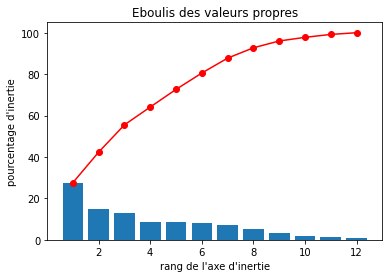

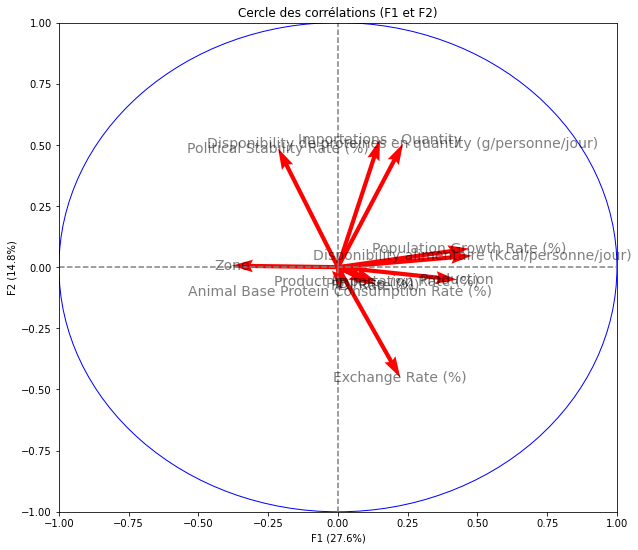

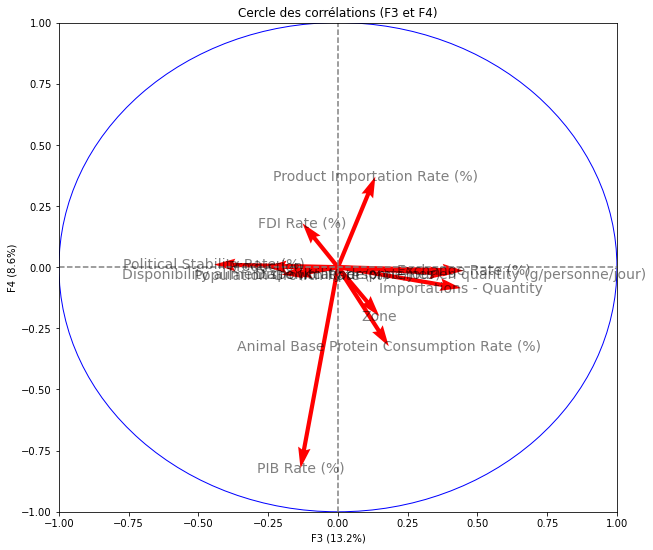

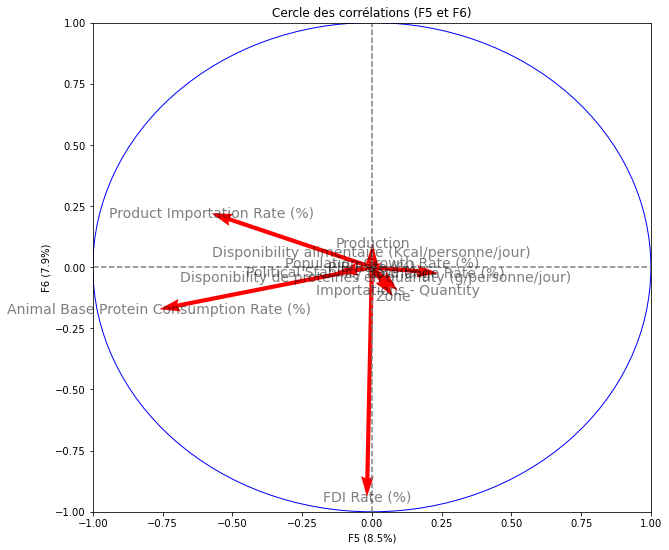

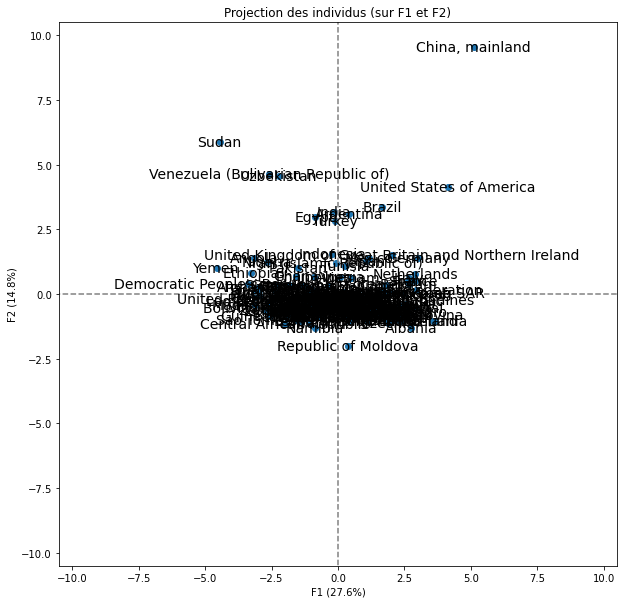

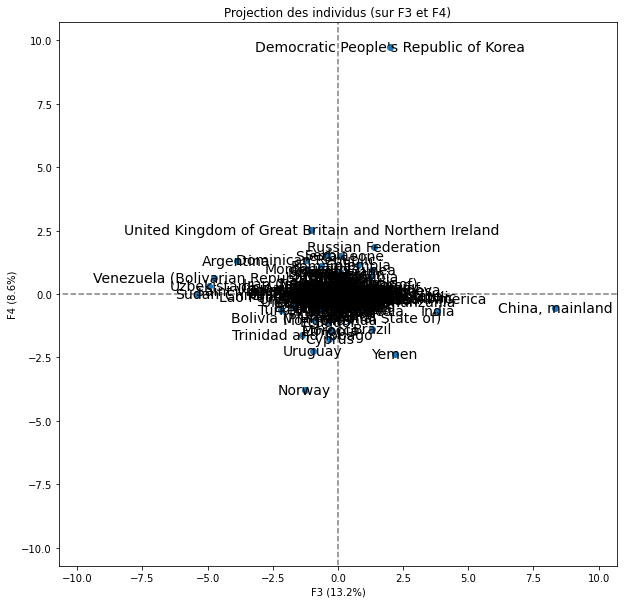

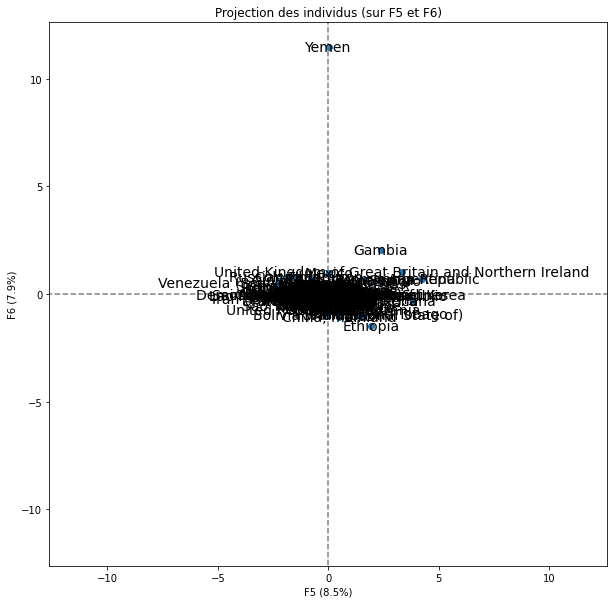

In [59]:
from sklearn import decomposition
from sklearn import preprocessing

# choix du nombre de composantes à calculer
n_comp = 12

# selection des colonnes à prendre en compte dans l'ACP
data_pca = x.loc[:, x.columns!='Zone']

X = data_pca.values
names = x["Zone"] # ou data.index pour avoir les intitulés
features = x.columns

# Centrage et Réduction
## To treat all the features equally by transforming the features in a way that makes their values fall within the same 
## numerical range. Thus, the differences between their values will be comparable.
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
## After data standardization, the next step is Dimensionality Reduction.
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
## To decide how many features we’d like to keep based on the cumulative variance plot.
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()

### Correspondence of Synthesis Axes
The correlation circles show the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. 
So, in this case, I decide to keep 6 components.

**F1:**
**F2:**
**F3:**
**F4:**
**F5:**
**F6:**

In [60]:
# Calculation of principal components
## Performing PCA with the chosen number of components. For this dataset, that means 6 principal components:

n_comp = 6
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.27582531 0.14753026 0.13176628 0.08598178 0.08522806 0.07895971]
0.8052913991068827


In [61]:
pd.DataFrame(X_scaled, columns= final_df.columns, index=final_df.index)

,Population Growth Rate (%),Disponibility alimentaire (Kcal/personne/jour),Disponibility de proteines en quantity (g/personne/jour),Importations - Quantity,Production,Animal Base Protein Consumption Rate (%),Political Stability Rate (%),Exchange Rate (%),PIB Rate (%),FDI Rate (%),Product Importation Rate (%),Producers' Cost of Production Rate (%)
Zone,,,,,,,,,,,,
Afghanistan,1.122586,-1.911626,-1.353509,-0.199701,-0.238334,-1.457125,0.224896,0.292098,-1.124921,0.052109,0.114015,-5.142986e-17
South Africa,0.159016,0.285402,0.108224,0.026273,0.016595,-0.173464,0.442146,-0.930925,0.639345,0.146709,0.138607,8.014406e-01
Albania,-1.176947,1.201940,1.913042,-0.385491,-0.271421,0.800177,0.274386,-1.210329,0.996576,0.034430,0.273298,5.761907e-01
Algeria,0.731572,1.079883,0.582151,0.567699,-0.170375,-0.896581,-0.005278,0.312313,-0.315875,-0.032106,0.206471,-2.217385e-01
Germany,-0.595081,1.554796,1.142474,2.937870,0.462239,1.230236,0.119421,-0.618311,0.194566,0.186778,0.169002,1.453784e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,0.186946,1.135363,1.301781,0.328212,-0.282355,-0.075563,0.343231,-0.130257,0.309474,0.016346,0.162255,-5.142986e-17
Ecuador,0.498826,-0.606724,-0.770214,-0.322228,-0.152078,0.183262,0.124812,-0.130257,-0.413586,0.112643,0.006655,-2.517088e+00
United States of America,-0.534567,2.005297,1.618898,3.846676,4.077714,1.534015,0.302703,-0.130257,-0.088405,-0.270290,0.152427,3.133025e-01


In [62]:
# Creating a new dataset with the calculated resulting components scores for the elements in our data set:

X_scaled = preprocessing.StandardScaler().fit_transform(final_df.values)
pca=decomposition.PCA(n_components=6)
X_projected = pca.fit_transform(X_scaled)
G = pd.DataFrame(X_projected, index=final_df.index, columns = ["F"+str(i+1) for i in range (6)])
G

,F1,F2,F3,F4,F5,F6
Zone,,,,,,
Afghanistan,-2.968891,0.262997,0.338730,-0.170927,-0.486712,-0.478188
South Africa,0.550650,-0.791201,0.867292,-0.008651,-0.507840,-0.053089
Albania,2.743652,-1.322731,-0.173795,0.288962,-0.232491,0.215809
Algeria,0.089149,0.652312,-0.138205,-0.211687,0.097001,-0.367632
Germany,3.024856,1.397656,0.844625,-0.203860,0.044475,-0.022076
...,...,...,...,...,...,...
United Arab Emirates,1.211660,-0.078635,-0.162797,-0.201452,-0.142955,-0.135466
Ecuador,-1.258662,-0.082509,-0.371558,-1.092172,1.270242,-0.640393
United States of America,4.130186,4.153897,2.340002,-0.194177,0.048398,-0.329269


I’ll incorporate the newly obtained PCA scores in the CAH &  K-means algorithm. 
That's how the analysis can be performed based on principal components scores instead of the original features.

In [83]:
GG = pd.DataFrame(G)
GG

### FINAL DATASET RELATIONSHIP ANALYSIS 
Analysing the relationship between at least two variables

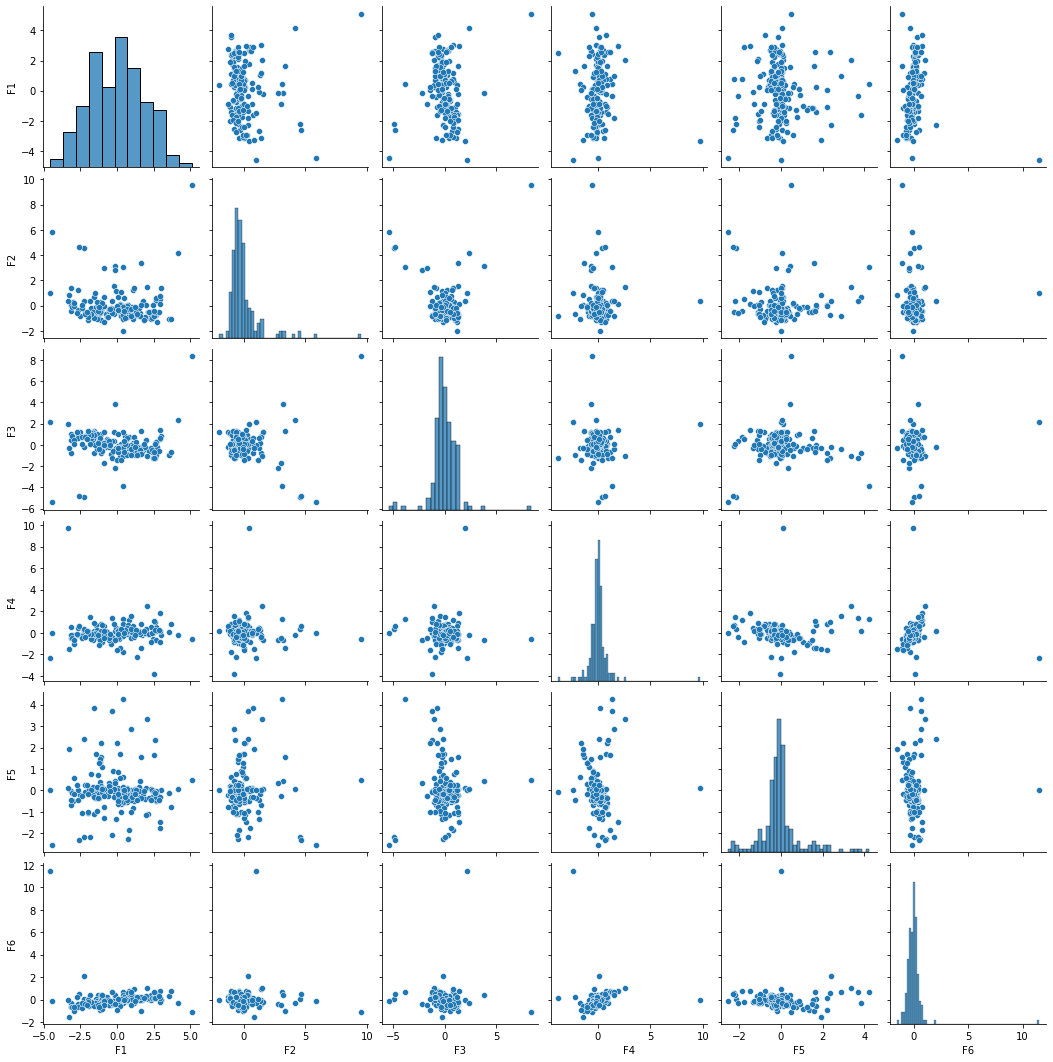

In [63]:
sns.pairplot(G)

These graphs show the relationship of 2 variables (relationship analysis). The result will display the strength and direction of the relationship. To analyse the relationship between variables, “correlation coefficients” need to be used.

            RESULT of the DISPLAY:
          1- We find for example that F5 could be correlated with F1
          2- Groups seem to appear naturally (ex.crossing of F4 and F5, we can see a fairly marked inter-group correlation)
          
For a characterization using the variables of the study, it is necessary to use univariate (easy to read) or multivariate (taking into account the relationships between the variables) statistical techniques.

# PERFORMING CLUSTERING
## HIERARCHICAL CLUSTERING (CAH) - DENDROGRAM
A **dendrogram** is a tree-structured graph used in heat maps to visualize the result of a hierarchical clustering calculation. The result of a clustering is presented either as the distance or the similarity between the clustered rows or columns depending on the selected distance measure.

The horizontal position of the split, shown by the short vertical bar, gives the distance (dissimilarity) between the two clusters

In [64]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(Z, names):
    plt.figure(figsize=(20,10)) 
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Countries')
    plt.ylabel('Euclidean distances')
    dendrogram(
        Z,
        labels = names, color_threshold=0)
    plt.show()

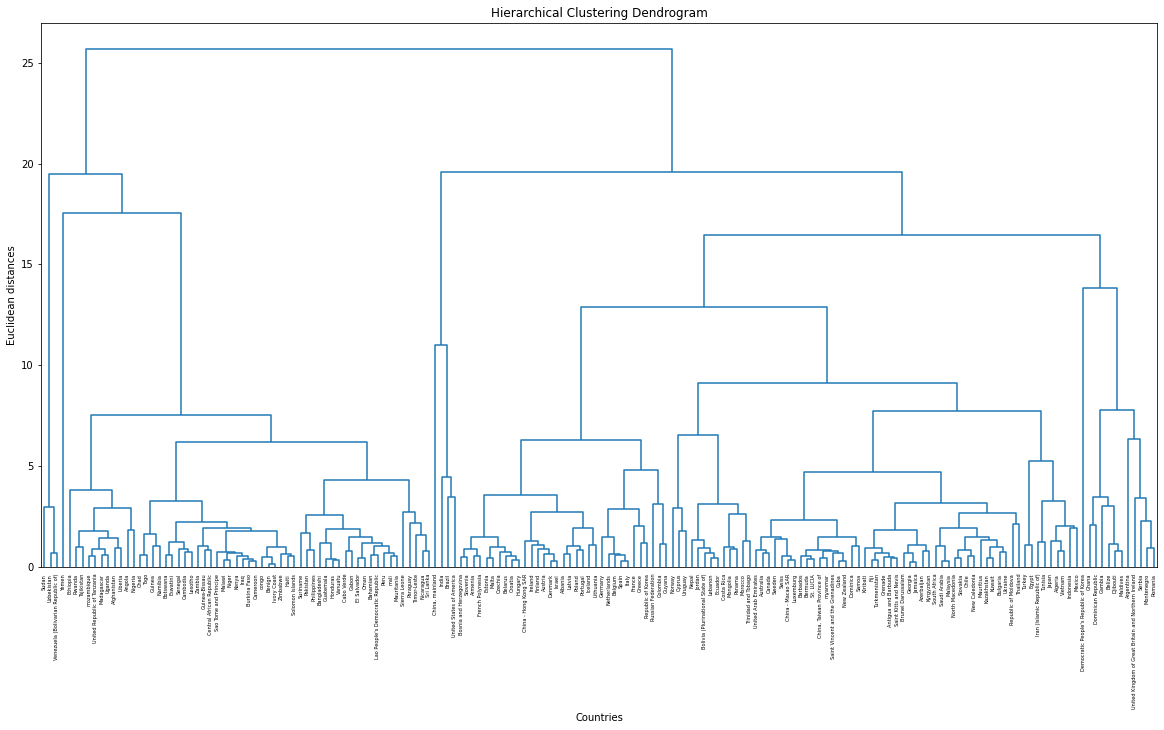

In [65]:
# classification hiérarchique

from scipy.cluster.hierarchy import linkage, fcluster

# préparation des données pour le clustering
a = G.values
names = G.index

# Clustering hiérarchique
Z = linkage(a, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

In the **dendrogram** locate the largest vertical difference between nodes, and in the middle pass an horizontal line. The number of vertical lines intersecting it is the optimal number of clusters.

The key to interpreting a dendrogram is to focus on the height at which any two objects are joined together. 

**Ward method** is a method that tries to minimize the variance within each cluster (minimizing the within-cluster variants). 

The dendrogram “suggests” a division into 6 groups. We note that a class of countries on the left (blue, orange, brown and red) stands out strongly from the others to the point that we could also have considered a division into 2 groups only.

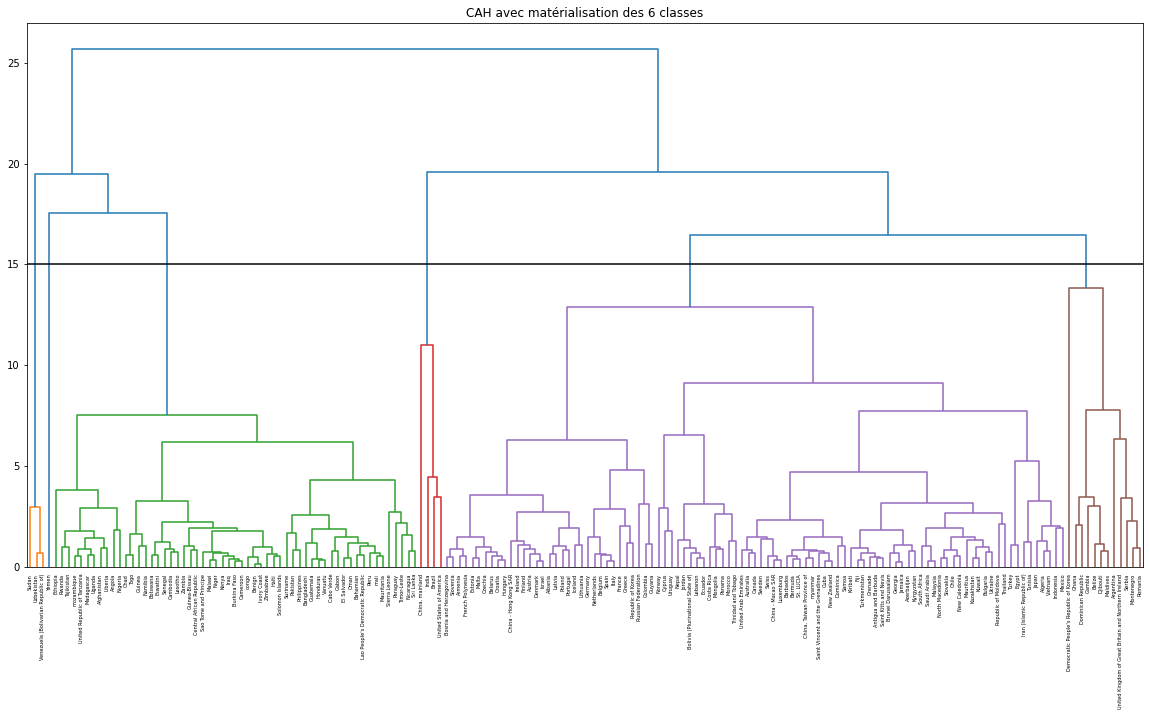

In [66]:
#matérialisation des 6 classes (hauteur t = 15)
max_d = 15

#découpage à la hauteur t = 15 ==> identifiants de 6 groupes obtenus
groupes_cah = fcluster(Z,t=15,criterion='distance')
plt.figure(figsize=(20,10)) 
plt.axhline(y=max_d, c='k')
plt.title('CAH avec matérialisation des 6 classes')
dendrogram(Z,labels=G.index,color_threshold=15)
plt.show()

In [67]:
#affichage des observations et leurs groupes

df_clusters = pd.DataFrame({"cluster": groupes_cah, "Zone": names})
df_clusters

,cluster,Zone
0,2,Afghanistan
1,5,South Africa
2,5,Albania
3,5,Algeria
4,5,Germany
...,...,...
169,5,United Arab Emirates
170,5,Ecuador
171,4,United States of America
172,2,Ethiopia


In [68]:
# Total Number of countries in each cluster
pivot = df_clusters.pivot_table(index=['cluster'], values=['Zone'], aggfunc=len)
pivot

,Zone
cluster,
1,3
2,57
3,1
4,4
5,97
6,12


## K-MEANS
Méthode des centres mobiles

For KMeans algorithm, we ourselves need to determine the number of clusters.
In order to do so, we run the algorithm with a different number of clusters. Then, we determine the **Within Cluster Sum of Squares (WCSS)** for each solution. 
Based on the values of the WCSS and an approach known as the Elbow method, a decision about how many clusters to be kept can be made.

First, it is needed to be decided how many clustering solutions we’d test.
In our case, we test an algorithm with up to 10 clusters.

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
# I fit KMeans using the transformed data from PCA
wcss = []
for i in range (1,21):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    km.fit(G)
    wcss.append(km.inertia_)

### ELBOW METHOD

The next step involves plotting the WCSS against the number of components on a graph.

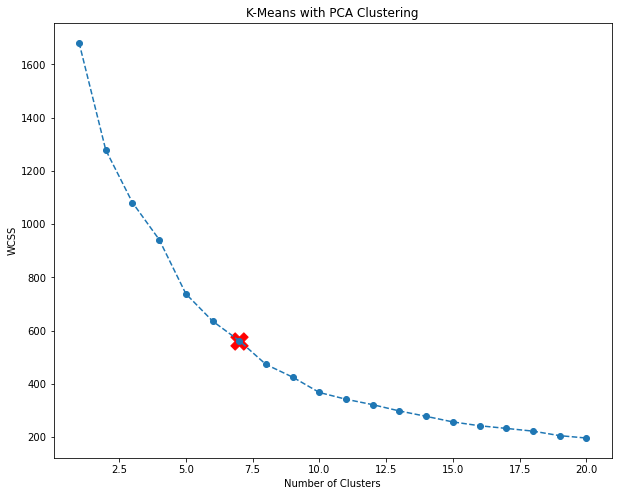

In [71]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.scatter(7, wcss[6], marker="X", s=300, c="r")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means with PCA Clustering')
plt.show()

From this graph, we determine the number of clusters we’d like to keep. To that effect, the **Elbow-method** is used. 

The approach consists of looking for a kink or elbow in the WCSS graph. Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother. In this instance, the kink comes at the 7 clusters mark. So, we’ll be keeping a **seven-cluster** solution.

In [72]:
## Seven clusters are chosen, so we run K-means with number of clusters equals to seven.
km = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)

In [73]:
## Our data is fit with the k-means PCA model
km.fit(G)

KMeans(n_clusters=7, random_state=42)

In [74]:
#affichage des observations et leurs groupes

km_clusters = pd.DataFrame({"cluster": km.labels_, "Zone": names})
km_clusters

,cluster,Zone
0,1,Afghanistan
1,2,South Africa
2,0,Albania
3,2,Algeria
4,0,Germany
...,...,...
169,2,United Arab Emirates
170,1,Ecuador
171,0,United States of America
172,1,Ethiopia


In [75]:
# Total Number of countries in each cluster
pivot2 = km_clusters.pivot_table(index=['cluster'], values=['Zone'], aggfunc=len)
pivot2

,Zone
cluster,
0,35
1,65
2,65
3,1
4,1
5,6
6,1


### Analysis of the results of kmeans algorithm
The components’ scores are stored in the ‘scores PCA’ variable. In addition, we also append the **‘CAH’ & 'KMeans'** labels to the new data frame.

In [76]:
## Adding CAH Clusters to the final dataset
G['CAH'] = groupes_cah
G

,F1,F2,F3,F4,F5,F6,CAH
Zone,,,,,,,
Afghanistan,-2.968891,0.262997,0.338730,-0.170927,-0.486712,-0.478188,2
South Africa,0.550650,-0.791201,0.867292,-0.008651,-0.507840,-0.053089,5
Albania,2.743652,-1.322731,-0.173795,0.288962,-0.232491,0.215809,5
Algeria,0.089149,0.652312,-0.138205,-0.211687,0.097001,-0.367632,5
Germany,3.024856,1.397656,0.844625,-0.203860,0.044475,-0.022076,5
...,...,...,...,...,...,...,...
United Arab Emirates,1.211660,-0.078635,-0.162797,-0.201452,-0.142955,-0.135466,5
Ecuador,-1.258662,-0.082509,-0.371558,-1.092172,1.270242,-0.640393,5
United States of America,4.130186,4.153897,2.340002,-0.194177,0.048398,-0.329269,4


In [77]:
G['CAH'] = G['CAH'].map({1:'first', 2:'second', 3:'third', 4:'fourth', 5:'fifth', 6:'sixth' })
G

,F1,F2,F3,F4,F5,F6,CAH
Zone,,,,,,,
Afghanistan,-2.968891,0.262997,0.338730,-0.170927,-0.486712,-0.478188,second
South Africa,0.550650,-0.791201,0.867292,-0.008651,-0.507840,-0.053089,fifth
Albania,2.743652,-1.322731,-0.173795,0.288962,-0.232491,0.215809,fifth
Algeria,0.089149,0.652312,-0.138205,-0.211687,0.097001,-0.367632,fifth
Germany,3.024856,1.397656,0.844625,-0.203860,0.044475,-0.022076,fifth
...,...,...,...,...,...,...,...
United Arab Emirates,1.211660,-0.078635,-0.162797,-0.201452,-0.142955,-0.135466,fifth
Ecuador,-1.258662,-0.082509,-0.371558,-1.092172,1.270242,-0.640393,fifth
United States of America,4.130186,4.153897,2.340002,-0.194177,0.048398,-0.329269,fourth


In [78]:
## Adding KMeans labels to the final dataset
G['KMeans'] = km.labels_

In [79]:
G['KMeans'] = G['KMeans'].map({0:'first', 1:'second', 2:'third', 3:'fourth', 4:'fifth', 5:'sixth', 6:'seventh'})
G

,F1,F2,F3,F4,F5,F6,CAH,KMeans
Zone,,,,,,,,
Afghanistan,-2.968891,0.262997,0.338730,-0.170927,-0.486712,-0.478188,second,second
South Africa,0.550650,-0.791201,0.867292,-0.008651,-0.507840,-0.053089,fifth,third
Albania,2.743652,-1.322731,-0.173795,0.288962,-0.232491,0.215809,fifth,first
Algeria,0.089149,0.652312,-0.138205,-0.211687,0.097001,-0.367632,fifth,third
Germany,3.024856,1.397656,0.844625,-0.203860,0.044475,-0.022076,fifth,first
...,...,...,...,...,...,...,...,...
United Arab Emirates,1.211660,-0.078635,-0.162797,-0.201452,-0.142955,-0.135466,fifth,third
Ecuador,-1.258662,-0.082509,-0.371558,-1.092172,1.270242,-0.640393,fifth,second
United States of America,4.130186,4.153897,2.340002,-0.194177,0.048398,-0.329269,fourth,first


## Visualizing the clusters on a 2D plane
For this visualisation, it is required to choose two components and use them as axes. 

The point of PCA was to determine the most important components. 

This way, we can be absolutely sure that the first two components explain more variance than the third one.

#### Visualisation the clusters with respect to the first two components:

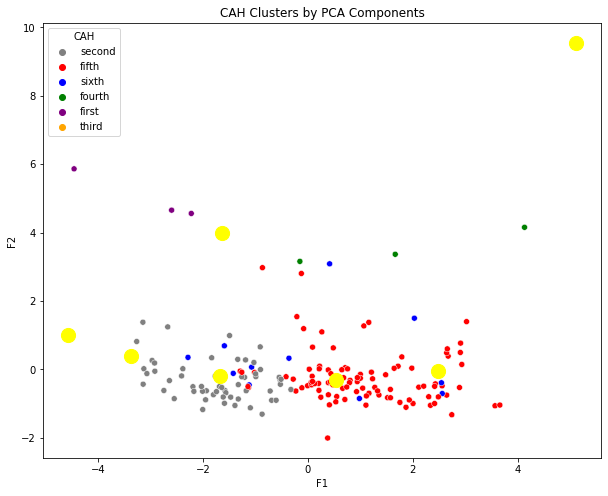

In [81]:
# Plotting data by PCA components:X-axis is F1 & Y-axis is F2
x_axis = G['F1']
y_axis = G['F2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = G['CAH'], palette = ['gray', 'red', 'blue', 'green', 'purple', 'orange'])

plt.title('CAH Clusters by PCA Components')
plt.show()

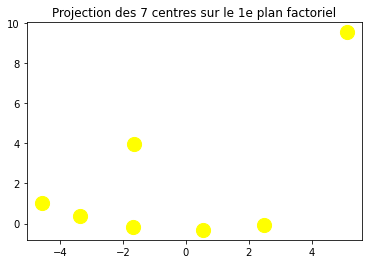

In [82]:
# Affichage des positions des centres de classes

x_axis = G['F1']
y_axis = G['F2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = G['CAH'], palette = ['gray', 'red', 'blue', 'green', 'purple', 'orange'])

centroids = km.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1], s=200, c='yellow', label = 'Centroids')
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))

plt.title('CAH Clusters by PCA Components')
plt.show()
plt.show(block=False)

In [ ]:
centroids = km.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1], s=200, c='yellow', label = 'Centroids')
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))

plt.show()
plt.show(block=False)

In [ ]:
init_list = ["k-means++", "random"]
inertia_list = []
for init in init_list:
    kmeans_model = KMeans(n_clusters=7, init=init)
    kmeans_model.fit(GG)
    inertia_list.append(kmeans_model.inertia_)

results = pd.DataFrame(data=inertia_list, columns=["Inertia Value"], index=init_list)
results

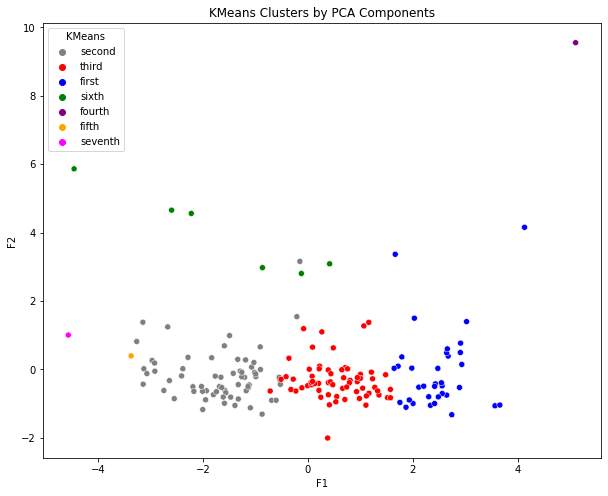

In [81]:
# Plotting data by PCA components:X-axis is F1 & Y-axis is F2
x_axis = G['F1']
y_axis = G['F2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = G['KMeans'], palette = ['gray', 'red', 'blue', 'green', 'purple', 'orange', 'magenta'])

plt.title('KMeans Clusters by PCA Components')
plt.show()

In [ ]:
# Affichage des positions des centres de classes

x_axis = G['F1']
y_axis = G['F2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = G['KMeans'], palette = ['gray', 'red', 'blue', 'green', 'purple', 'orange', 'magenta'])

centroids = km.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1], s=200, c='yellow', label = 'Centroids')
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))

plt.title('CAH Clusters by PCA Components')
plt.show()
plt.show(block=False)

In [ ]:
centroids = km.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1], s=200, c='yellow', label = 'Centroids')
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))

plt.show()
plt.show(block=False)

In [ ]:
init_list = ["k-means++", "random"]
inertia_list = []
for init in init_list:
    kmeans_model = KMeans(n_clusters=7, init=init)
    kmeans_model.fit(GG)
    inertia_list.append(kmeans_model.inertia_)

results = pd.DataFrame(data=inertia_list, columns=["Inertia Value"], index=init_list)
results

That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.
Not only that, but they are ‘orthogonal’ to each other. This means that the difference between components is as big as possible.
There is some overlap between the red and blue segments. But, as a whole, all four segments are clearly separated. The spots where the two overlap are ultimately determined by the third component, which is not available on this graph.

In [82]:
# Correspondance avec les groupes de la CAH
crosstab = pd.crosstab(groupes_cah, km.labels_)
crosstab

col_0,0,1,2,3,4,5,6
row_0,,,,,,,
1,0,0,0,0,0,3,0
2,0,53,4,0,0,0,0
3,0,0,0,0,0,0,1
4,2,1,0,1,0,0,0
5,30,6,59,0,0,2,0
6,3,5,2,0,1,1,0


**CAH – K-Means correspondence:** *Group 1* of the CAH coincides with *Group 5* of the K-Means or *Group 3* of the CAH coincides with *Group 6* of the K-Means. Afterwards, there are certainly correspondences, but they are not exact.

In [83]:
G

,F1,F2,F3,F4,F5,F6,CAH,KMeans
Zone,,,,,,,,
Afghanistan,-2.968891,0.262997,0.338730,-0.170927,-0.486712,-0.478188,second,second
South Africa,0.550650,-0.791201,0.867292,-0.008651,-0.507840,-0.053089,fifth,third
Albania,2.743652,-1.322731,-0.173795,0.288962,-0.232491,0.215809,fifth,first
Algeria,0.089149,0.652312,-0.138205,-0.211687,0.097001,-0.367632,fifth,third
Germany,3.024856,1.397656,0.844625,-0.203860,0.044475,-0.022076,fifth,first
...,...,...,...,...,...,...,...,...
United Arab Emirates,1.211660,-0.078635,-0.162797,-0.201452,-0.142955,-0.135466,fifth,third
Ecuador,-1.258662,-0.082509,-0.371558,-1.092172,1.270242,-0.640393,fifth,second
United States of America,4.130186,4.153897,2.340002,-0.194177,0.048398,-0.329269,fourth,first


In [84]:
target_countries_CAH = G[G['CAH'].isin(['fourth', 'fifth']) == True]
target_countries_CAH

,F1,F2,F3,F4,F5,F6,CAH,KMeans
Zone,,,,,,,,
South Africa,0.550650,-0.791201,0.867292,-0.008651,-0.507840,-0.053089,fifth,third
Albania,2.743652,-1.322731,-0.173795,0.288962,-0.232491,0.215809,fifth,first
Algeria,0.089149,0.652312,-0.138205,-0.211687,0.097001,-0.367632,fifth,third
Germany,3.024856,1.397656,0.844625,-0.203860,0.044475,-0.022076,fifth,first
Antigua and Barbuda,0.211471,-0.610732,-0.518515,0.033971,-0.212887,0.007841,fifth,third
...,...,...,...,...,...,...,...,...
Vietnam,0.484801,0.630625,0.401572,-0.029488,0.029361,-0.038214,fifth,third
Egypt,-0.865778,2.973963,-1.688547,-0.505330,-0.237367,-0.445795,fifth,sixth
United Arab Emirates,1.211660,-0.078635,-0.162797,-0.201452,-0.142955,-0.135466,fifth,third


In [85]:
target_countries_KMeans = G[G['KMeans'].isin(['first', 'fourth']) == True]
target_countries_KMeans

,F1,F2,F3,F4,F5,F6,CAH,KMeans
Zone,,,,,,,,
Albania,2.743652,-1.322731,-0.173795,0.288962,-0.232491,0.215809,fifth,first
Germany,3.024856,1.397656,0.844625,-0.203860,0.044475,-0.022076,fifth,first
Australia,1.720653,0.095096,-0.690481,-0.237192,0.004462,-0.025771,fifth,first
Austria,2.431273,-0.420822,-0.705833,-0.544933,-0.090279,0.105955,fifth,first
Belgium,2.674457,0.389820,0.211183,0.501575,-0.505837,0.257224,fifth,first
Brazil,1.665599,3.365556,1.301401,-1.367437,1.572549,-1.031222,fourth,first
Canada,1.791187,0.366926,-0.116092,0.019470,-0.036341,0.011350,fifth,first
China - Hong Kong SAR,2.477960,0.030973,-1.220886,-0.037030,-0.008845,0.365356,fifth,first
"China, mainland",5.103438,9.548113,8.323571,-0.544738,0.494889,-1.083665,fourth,fourth


### CLUSTERMAP - KMEANS

In [86]:
GG = G.drop(columns=['CAH'])
GG = GG.reset_index()
GG = GG.groupby(['KMeans'])['F1', 'F2', 'F3', 'F4', 'F5', 'F6'].mean()

GG = pd.DataFrame(GG)
GG = round(GG, 3)

GG

,F1,F2,F3,F4,F5,F6
KMeans,,,,,,
fifth,-3.368,0.396,1.999,9.730,0.111,-0.040
first,2.476,-0.055,-0.182,0.062,-0.047,0.198
fourth,5.103,9.548,8.324,-0.545,0.495,-1.084
second,-1.673,-0.188,0.514,-0.156,0.143,-0.271
seventh,-4.566,1.006,2.179,-2.344,0.015,11.479
sixth,-1.642,3.990,-3.819,0.191,-0.441,0.035
third,0.535,-0.319,-0.256,-0.001,-0.087,0.002


<AxesSubplot:ylabel='KMeans'>

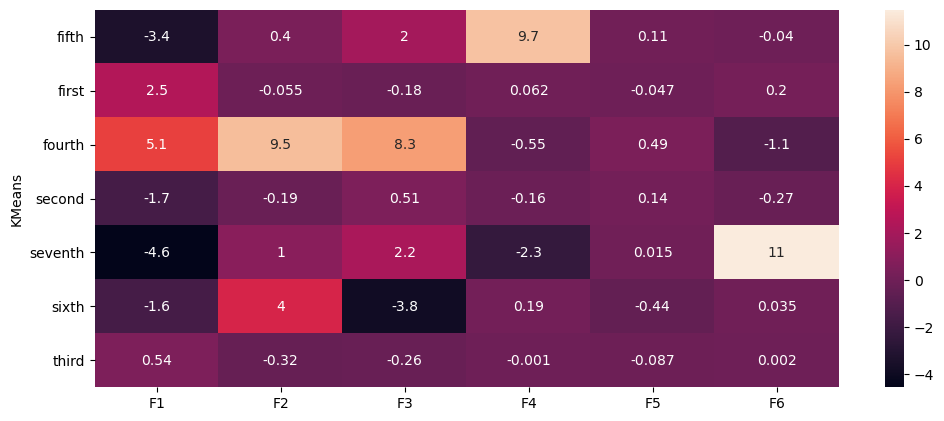

In [87]:
plt. figure(figsize=(12,5), dpi=100)
sns.heatmap(GG, xticklabels = GG.columns, yticklabels = GG.index, annot = True)

### CLUSTERMAP - CAH

In [88]:
GGG = G.drop(columns=['KMeans'])
GGG = GGG.reset_index()
GGG = GGG.groupby(['CAH'])['F1', 'F2', 'F3', 'F4', 'F5', 'F6'].mean()

GGG = pd.DataFrame(GGG)
GGG = round(GGG, 3)

GGG

,F1,F2,F3,F4,F5,F6
CAH,,,,,,
fifth,1.061,-0.229,-0.257,-0.090,-0.150,0.011
first,-3.092,5.025,-5.045,0.329,-2.328,0.130
fourth,2.687,5.056,3.946,-0.698,0.637,-0.518
second,-1.704,-0.316,0.537,-0.136,-0.191,-0.300
sixth,-0.224,0.326,-0.707,1.720,2.493,0.516
third,-4.566,1.006,2.179,-2.344,0.015,11.479


<AxesSubplot:ylabel='CAH'>

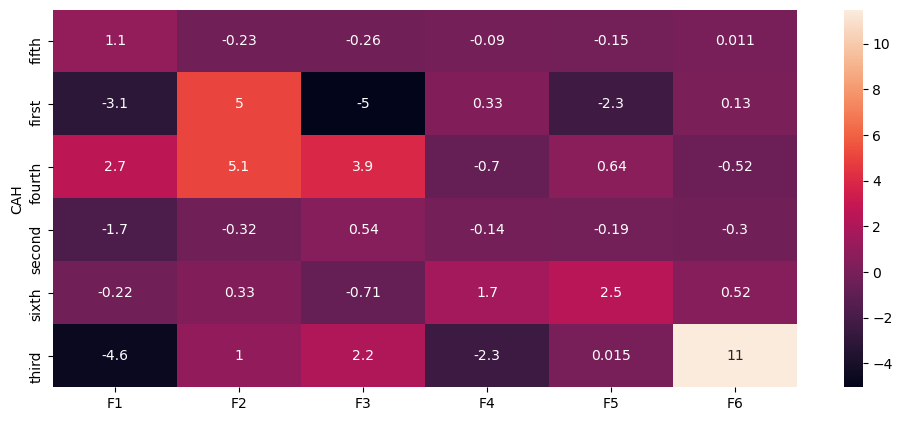

In [89]:
plt. figure(figsize=(12,5), dpi=100)
sns.heatmap(GGG, xticklabels = GGG.columns, yticklabels = GGG.index, annot = True)